In [15]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp

# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Juan Sebastian Novoa Ortiz

*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

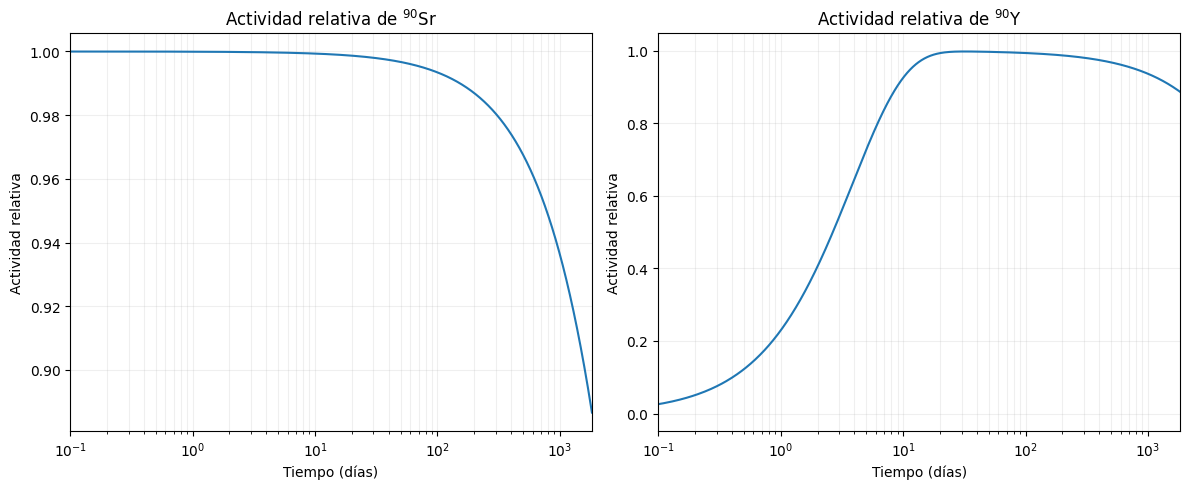

Razón de actividades Y/Sr a t=50 días: 1.0003
Razón teórica en equilibrio secular: 0.0003


In [3]:
# Constantes de desintegración a partir de las vidas medias
vida_media_sr = 28.78 * 365.25  # días
vida_media_y = 2.67  # días
lambda_sr = np.log(2) / vida_media_sr
lambda_y = np.log(2) / vida_media_y

# Condiciones iniciales (empezamos con Sr puro)
n_sr_inicial = 1.0
n_y_inicial = 0.0

# Parámetros de tiempo
tiempo_total = 365 * 5  # 5 años en días
dt = 0.01  # paso de tiempo en días
num_pasos = int(tiempo_total / dt)

# Arrays para almacenar resultados
tiempo = np.zeros(num_pasos)
n_sr = np.zeros(num_pasos)
n_y = np.zeros(num_pasos)

# Condiciones iniciales
n_sr[0] = n_sr_inicial
n_y[0] = n_y_inicial

# Método de Euler
for i in range(1, num_pasos):
    tiempo[i] = tiempo[i-1] + dt

    # Derivadas según las ecuaciones diferenciales
    dn_sr_dt = -lambda_sr * n_sr[i-1]
    dn_y_dt = -lambda_y * n_y[i-1] + lambda_sr * n_sr[i-1]

    # Actualización usando Euler
    n_sr[i] = n_sr[i-1] + dn_sr_dt * dt
    n_y[i] = n_y[i-1] + dn_y_dt * dt

# Cálculo de actividades (A = λN)
actividad_sr = lambda_sr * n_sr
actividad_y = lambda_y * n_y

# Normalización relativa a la actividad inicial de Sr
actividad_sr_inicial = lambda_sr * n_sr_inicial
actividad_sr_relativa = actividad_sr / actividad_sr_inicial
actividad_y_relativa = actividad_y / actividad_sr_inicial

# Gráficas con escala logarítmica en tiempo
plt.figure(figsize=(12, 5))

# Gráfica de Sr-90
plt.subplot(1, 2, 1)
plt.semilogx(tiempo[1:], actividad_sr_relativa[1:])
plt.xlabel('Tiempo (días)')
plt.ylabel('Actividad relativa')
plt.title('Actividad relativa de $^{90}$Sr')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlim(0.1, tiempo_total)

# Gráfica de Y-90
plt.subplot(1, 2, 2)
plt.semilogx(tiempo[1:], actividad_y_relativa[1:])
plt.xlabel('Tiempo (días)')
plt.ylabel('Actividad relativa')
plt.title('Actividad relativa de $^{90}$Y')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlim(0.1, tiempo_total)

plt.tight_layout()
plt.show()

# Verificación del equilibrio secular
tiempo_equilibrio = 50  # días para verificar
indice_equilibrio = int(tiempo_equilibrio / dt)
razon_actividades = actividad_y[indice_equilibrio] / actividad_sr[indice_equilibrio]
razon_teorica = lambda_sr / (lambda_y - lambda_sr)

print(f"Razón de actividades Y/Sr a t={tiempo_equilibrio} días: {razon_actividades:.4f}")
print(f"Razón teórica en equilibrio secular: {razon_teorica:.4f}")

# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

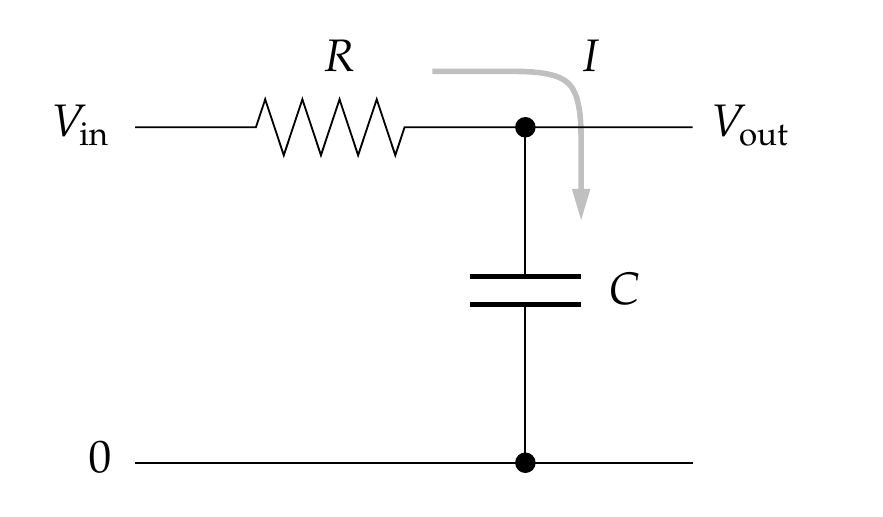

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

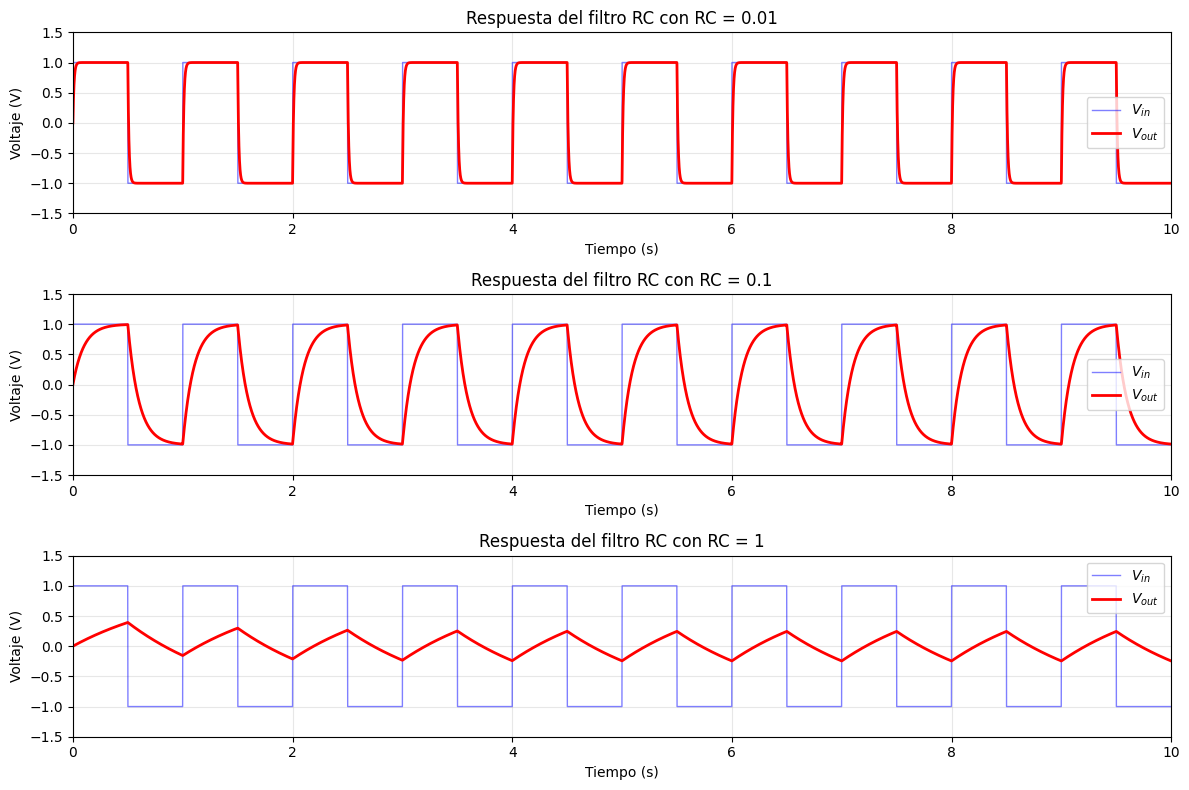

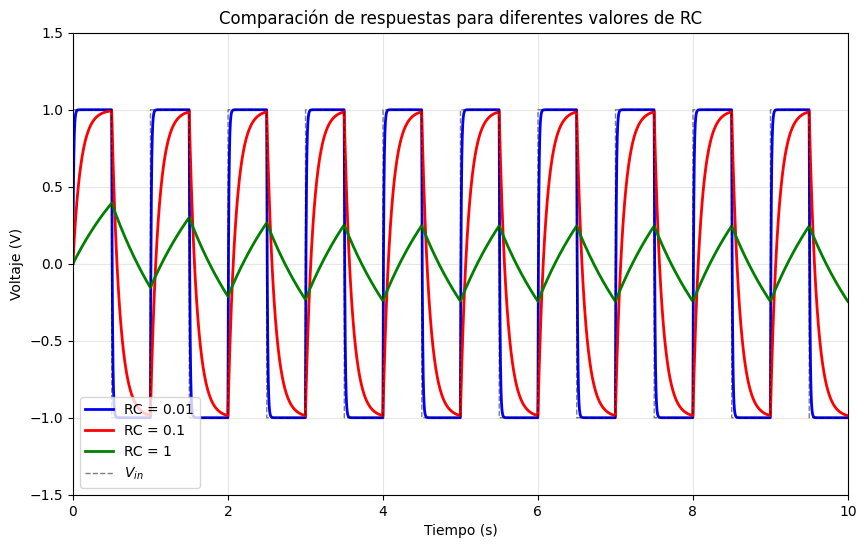

In [4]:
# Función para la onda cuadrada
def onda_cuadrada(t):
    return 1 if int(2*t) % 2 == 0 else -1

# Derivada de V_out según la ecuación diferencial
def derivada_v_out(t, v_out, rc):
    v_in = onda_cuadrada(t)
    return (v_in - v_out) / rc

# Método de Runge-Kutta de cuarto orden
def runge_kutta_4(t0, tf, v0, rc, dt):
    num_pasos = int((tf - t0) / dt)
    tiempo = np.zeros(num_pasos)
    v_out = np.zeros(num_pasos)
    v_in = np.zeros(num_pasos)

    # Condiciones iniciales
    tiempo[0] = t0
    v_out[0] = v0
    v_in[0] = onda_cuadrada(t0)

    # Iteración RK4
    for i in range(1, num_pasos):
        t = tiempo[i-1]
        v = v_out[i-1]

        # Coeficientes RK4
        k1 = derivada_v_out(t, v, rc)
        k2 = derivada_v_out(t + dt/2, v + k1*dt/2, rc)
        k3 = derivada_v_out(t + dt/2, v + k2*dt/2, rc)
        k4 = derivada_v_out(t + dt, v + k3*dt, rc)

        # Actualización
        tiempo[i] = t + dt
        v_out[i] = v + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
        v_in[i] = onda_cuadrada(tiempo[i])

    return tiempo, v_out, v_in

# Parámetros de simulación
t_inicial = 0
t_final = 10
v_inicial = 0
dt = 0.001  # paso de tiempo pequeño para buena precisión

# Valores de RC a simular
valores_rc = [0.01, 0.1, 1]

# Crear figura con subplots
plt.figure(figsize=(12, 8))

for idx, rc in enumerate(valores_rc):
    # Resolver la ecuación diferencial
    tiempo, v_out, v_in = runge_kutta_4(t_inicial, t_final, v_inicial, rc, dt)

    # Graficar resultados
    plt.subplot(3, 1, idx + 1)
    plt.plot(tiempo, v_in, 'b-', alpha=0.5, linewidth=1, label='$V_{in}$')
    plt.plot(tiempo, v_out, 'r-', linewidth=2, label='$V_{out}$')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Voltaje (V)')
    plt.title(f'Respuesta del filtro RC con RC = {rc}')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xlim(0, 10)
    plt.ylim(-1.5, 1.5)

plt.tight_layout()
plt.show()

# Análisis del comportamiento en diferentes frecuencias
plt.figure(figsize=(10, 6))
colores = ['blue', 'red', 'green']

for rc, color in zip(valores_rc, colores):
    tiempo, v_out, _ = runge_kutta_4(t_inicial, t_final, v_inicial, rc, dt)
    plt.plot(tiempo, v_out, color=color, linewidth=2, label=f'RC = {rc}')

# Señal de entrada para referencia
plt.plot(tiempo, v_in, 'k--', alpha=0.5, linewidth=1, label='$V_{in}$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.title('Comparación de respuestas para diferentes valores de RC')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

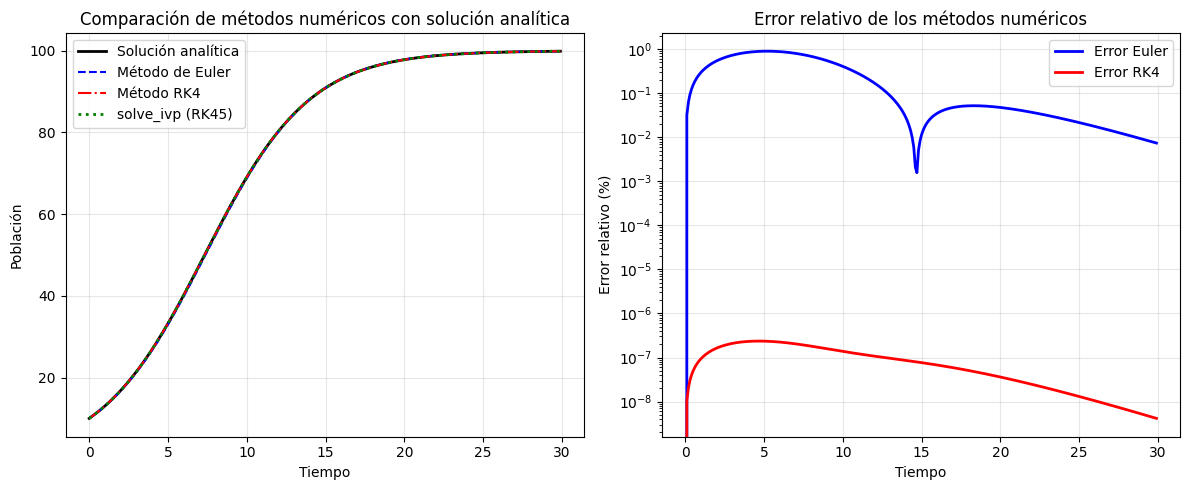

Error relativo máximo - Euler: 0.897898%
Error relativo promedio - Euler: 0.255861%
Error relativo máximo - RK4: 0.000000%
Error relativo promedio - RK4: 0.000000%
Población de equilibrio teórica: 100
Población final - Analítica: 99.8857
Población final - Euler: 99.8931
Población final - RK4: 99.8857


In [6]:
# Función que representa la ecuación logística
def my_logistic_eq(t, P, r, K):
    dP = r * P * (1 - P/K)
    return dP

# Solución analítica de la ecuación logística
def solucion_analitica(t, P0, r, K):
    numerador = K * P0 * np.exp(r * t)
    denominador = K + P0 * (np.exp(r * t) - 1)
    return numerador / denominador

# Método de Euler
def euler(f, t0, tf, P0, r, K, dt):
    num_pasos = int((tf - t0) / dt)
    tiempo = np.zeros(num_pasos)
    poblacion = np.zeros(num_pasos)

    tiempo[0] = t0
    poblacion[0] = P0

    for i in range(1, num_pasos):
        tiempo[i] = tiempo[i-1] + dt
        dP = f(tiempo[i-1], poblacion[i-1], r, K)
        poblacion[i] = poblacion[i-1] + dP * dt

    return tiempo, poblacion

# Método de Runge-Kutta 4
def runge_kutta_4(f, t0, tf, P0, r, K, dt):
    num_pasos = int((tf - t0) / dt)
    tiempo = np.zeros(num_pasos)
    poblacion = np.zeros(num_pasos)

    tiempo[0] = t0
    poblacion[0] = P0

    for i in range(1, num_pasos):
        t = tiempo[i-1]
        P = poblacion[i-1]

        k1 = f(t, P, r, K)
        k2 = f(t + dt/2, P + k1*dt/2, r, K)
        k3 = f(t + dt/2, P + k2*dt/2, r, K)
        k4 = f(t + dt, P + k3*dt, r, K)

        tiempo[i] = t + dt
        poblacion[i] = P + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

    return tiempo, poblacion

# Parámetros del problema
r = 0.3  # tasa de crecimiento
K = 100  # capacidad de carga
P0 = 10  # población inicial
t_inicial = 0
t_final = 30
dt = 0.1

# Resolver usando los tres métodos
tiempo_euler, poblacion_euler = euler(my_logistic_eq, t_inicial, t_final, P0, r, K, dt)
tiempo_rk4, poblacion_rk4 = runge_kutta_4(my_logistic_eq, t_inicial, t_final, P0, r, K, dt)

# Solución analítica en los mismos puntos de tiempo
poblacion_analitica_euler = solucion_analitica(tiempo_euler, P0, r, K)
poblacion_analitica_rk4 = solucion_analitica(tiempo_rk4, P0, r, K)

# También usar solve_ivp para comparación
sol_ivp = solve_ivp(lambda t, P: my_logistic_eq(t, P, r, K),
                    [t_inicial, t_final], [P0],
                    t_eval=tiempo_euler, method='RK45')

# Graficar resultados
plt.figure(figsize=(12, 5))

# Primera gráfica: Comparación de métodos
plt.subplot(1, 2, 1)
plt.plot(tiempo_euler, poblacion_analitica_euler, 'k-', linewidth=2, label='Solución analítica')
plt.plot(tiempo_euler, poblacion_euler, 'b--', linewidth=1.5, label='Método de Euler')
plt.plot(tiempo_rk4, poblacion_rk4, 'r-.', linewidth=1.5, label='Método RK4')
plt.plot(sol_ivp.t, sol_ivp.y[0], 'g:', linewidth=2, label='solve_ivp (RK45)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Comparación de métodos numéricos con solución analítica')
plt.legend()
plt.grid(True, alpha=0.3)

# Segunda gráfica: Error relativo
plt.subplot(1, 2, 2)
# Calcular errores relativos
error_euler = np.abs(poblacion_euler - poblacion_analitica_euler) / poblacion_analitica_euler * 100
error_rk4 = np.abs(poblacion_rk4 - poblacion_analitica_rk4) / poblacion_analitica_rk4 * 100

plt.semilogy(tiempo_euler, error_euler, 'b-', linewidth=2, label='Error Euler')
plt.semilogy(tiempo_rk4, error_rk4, 'r-', linewidth=2, label='Error RK4')
plt.xlabel('Tiempo')
plt.ylabel('Error relativo (%)')
plt.title('Error relativo de los métodos numéricos')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Imprimir estadísticas de error
print(f"Error relativo máximo - Euler: {np.max(error_euler):.6f}%")
print(f"Error relativo promedio - Euler: {np.mean(error_euler):.6f}%")
print(f"Error relativo máximo - RK4: {np.max(error_rk4):.6f}%")
print(f"Error relativo promedio - RK4: {np.mean(error_rk4):.6f}%")

# Verificar comportamiento a largo plazo
indice_equilibrio = -100  # últimos 100 puntos
print(f"Población de equilibrio teórica: {K}")
print(f"Población final - Analítica: {poblacion_analitica_euler[-1]:.4f}")
print(f"Población final - Euler: {poblacion_euler[-1]:.4f}")
print(f"Población final - RK4: {poblacion_rk4[-1]:.4f}")

# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=2 \pi \sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

Calculando periodos...
u0 = 1.000 rad:
  Periodo numerico: 2.1391 s
  Periodo analitico: 2.1391 s
  Error relativo: 0.00%
u0 = 1.571 rad:
  Periodo numerico: 2.3678 s
  Periodo analitico: 2.3678 s
  Error relativo: 0.00%


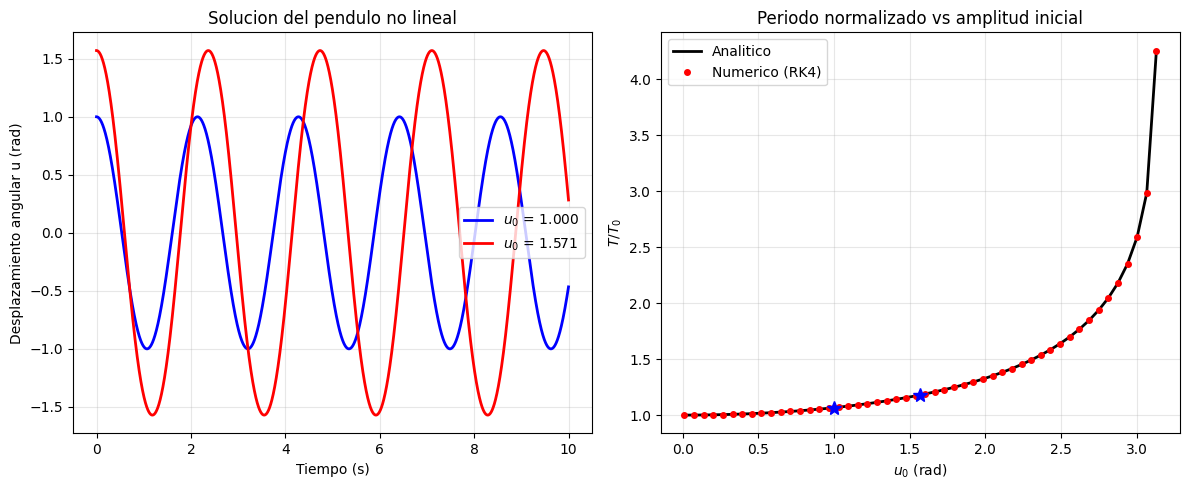

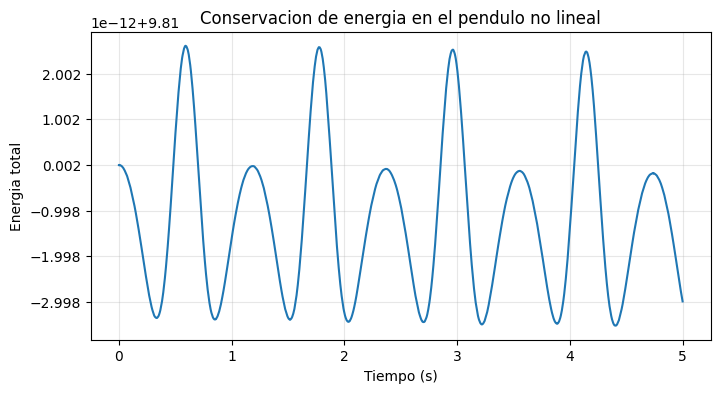

In [19]:
# El codigo tarda mucho en ejecutarse
# Parametros del pendulo
g = 9.81  # aceleracion gravitacional
l = 1.0   # longitud del pendulo
h = 0.001 # paso de tiempo

# Sistema de ecuaciones diferenciales de primer orden
def sistema_pendulo(t, estado):
    u, u_dot = estado
    u_ddot = -(g/l) * np.sin(u)
    return np.array([u_dot, u_ddot])

# Metodo de Runge-Kutta 4 para sistema de ecuaciones
def rk4_sistema(f, t0, tf, estado0, h):
    num_pasos = int((tf - t0) / h)
    tiempo = np.zeros(num_pasos)
    u = np.zeros(num_pasos)
    u_dot = np.zeros(num_pasos)

    # Condiciones iniciales
    tiempo[0] = t0
    u[0] = estado0[0]
    u_dot[0] = estado0[1]

    for i in range(1, num_pasos):
        t = tiempo[i-1]
        estado = np.array([u[i-1], u_dot[i-1]])

        k1 = f(t, estado)
        k2 = f(t + h/2, estado + k1*h/2)
        k3 = f(t + h/2, estado + k2*h/2)
        k4 = f(t + h, estado + k3*h)

        estado_nuevo = estado + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

        tiempo[i] = t + h
        u[i] = estado_nuevo[0]
        u_dot[i] = estado_nuevo[1]

    return tiempo, u, u_dot

# Funcion para encontrar el periodo numericamente
def encontrar_periodo(u0):
    t_final = 20  # tiempo suficiente para varias oscilaciones
    estado_inicial = np.array([u0, 0])

    tiempo, u, u_dot = rk4_sistema(sistema_pendulo, 0, t_final, estado_inicial, h)

    # Encontrar cruces por cero con velocidad positiva
    cruces = []
    for i in range(1, len(u)-1):
        # Detectar cuando u cruza cero de negativo a positivo
        if u[i-1] < 0 and u[i] >= 0 and u_dot[i] > 0:
            # Interpolacion lineal para mayor precision
            t_cruce = tiempo[i-1] + (0 - u[i-1]) * (tiempo[i] - tiempo[i-1]) / (u[i] - u[i-1])
            cruces.append(t_cruce)

    # El periodo es la diferencia entre cruces consecutivos
    if len(cruces) >= 2:
        return cruces[1] - cruces[0]
    else:
        return np.nan

# Integral eliptica completa de primera especie
def K_eliptica(alpha):
    def integrando(z, alpha):
        return 1.0 / np.sqrt((1 - z**2) * (1 - alpha * z**2))

    resultado, _ = quad(integrando, 0, 1, args=(alpha,))
    return resultado

# Periodo teorico
def periodo_teorico(u0):
    T0 = 2 * np.pi * np.sqrt(l / g)
    alpha = np.sin(u0/2)**2
    return T0 * (2/np.pi) * K_eliptica(alpha)

# Resolver para u0 = 1 y u0 = pi/2
valores_u0 = [1.0, np.pi/2]
colores = ['blue', 'red']
t_final = 10

plt.figure(figsize=(12, 5))

# Grafica de las soluciones
plt.subplot(1, 2, 1)
for u0, color in zip(valores_u0, colores):
    estado_inicial = np.array([u0, 0])
    tiempo, u, _ = rk4_sistema(sistema_pendulo, 0, t_final, estado_inicial, h)
    plt.plot(tiempo, u, color=color, linewidth=2, label=f'$u_0$ = {u0:.3f}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Desplazamiento angular u (rad)')
plt.title('Solucion del pendulo no lineal')
plt.legend()
plt.grid(True, alpha=0.3)

# Grafica de T/T0 vs u0
plt.subplot(1, 2, 2)

# Calcular para un rango de u0
u0_rango = np.linspace(0.01, np.pi - 0.01, 50)
T0 = 2 * np.pi * np.sqrt(l / g)
T_numerico = []
T_analitico = []

print("Calculando periodos...")
for u0 in u0_rango:
    # Periodo numerico
    T_num = encontrar_periodo(u0)
    T_numerico.append(T_num)

    # Periodo analitico
    T_ana = periodo_teorico(u0)
    T_analitico.append(T_ana)

# Convertir a arrays y normalizar
T_numerico = np.array(T_numerico)
T_analitico = np.array(T_analitico)

# Graficar
plt.plot(u0_rango, T_analitico/T0, 'k-', linewidth=2, label='Analitico')
plt.plot(u0_rango, T_numerico/T0, 'ro', markersize=4, label='Numerico (RK4)')

# Marcar los valores especificos calculados
for u0 in valores_u0:
    T_num = encontrar_periodo(u0)
    T_ana = periodo_teorico(u0)
    plt.plot(u0, T_num/T0, 'b*', markersize=10)
    print(f"u0 = {u0:.3f} rad:")
    print(f"  Periodo numerico: {T_num:.4f} s")
    print(f"  Periodo analitico: {T_ana:.4f} s")
    print(f"  Error relativo: {abs(T_num - T_ana)/T_ana * 100:.2f}%")

plt.xlabel('$u_0$ (rad)')
plt.ylabel('$T/T_0$')
plt.title('Periodo normalizado vs amplitud inicial')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verificacion adicional: energia total
def energia_total(u, u_dot):
    energia_cinetica = 0.5 * l**2 * u_dot**2
    energia_potencial = g * l * (1 - np.cos(u))
    return energia_cinetica + energia_potencial

# Verificar conservacion de energia para u0 = pi/2
estado_inicial = np.array([np.pi/2, 0])
tiempo, u, u_dot = rk4_sistema(sistema_pendulo, 0, 5, estado_inicial, h)
energia = [energia_total(u[i], u_dot[i]) for i in range(len(tiempo))]

plt.figure(figsize=(8, 4))
plt.plot(tiempo, energia)
plt.xlabel('Tiempo (s)')
plt.ylabel('Energia total')
plt.title('Conservacion de energia en el pendulo no lineal')
plt.grid(True, alpha=0.3)
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

Resolviendo con h = 0.1...


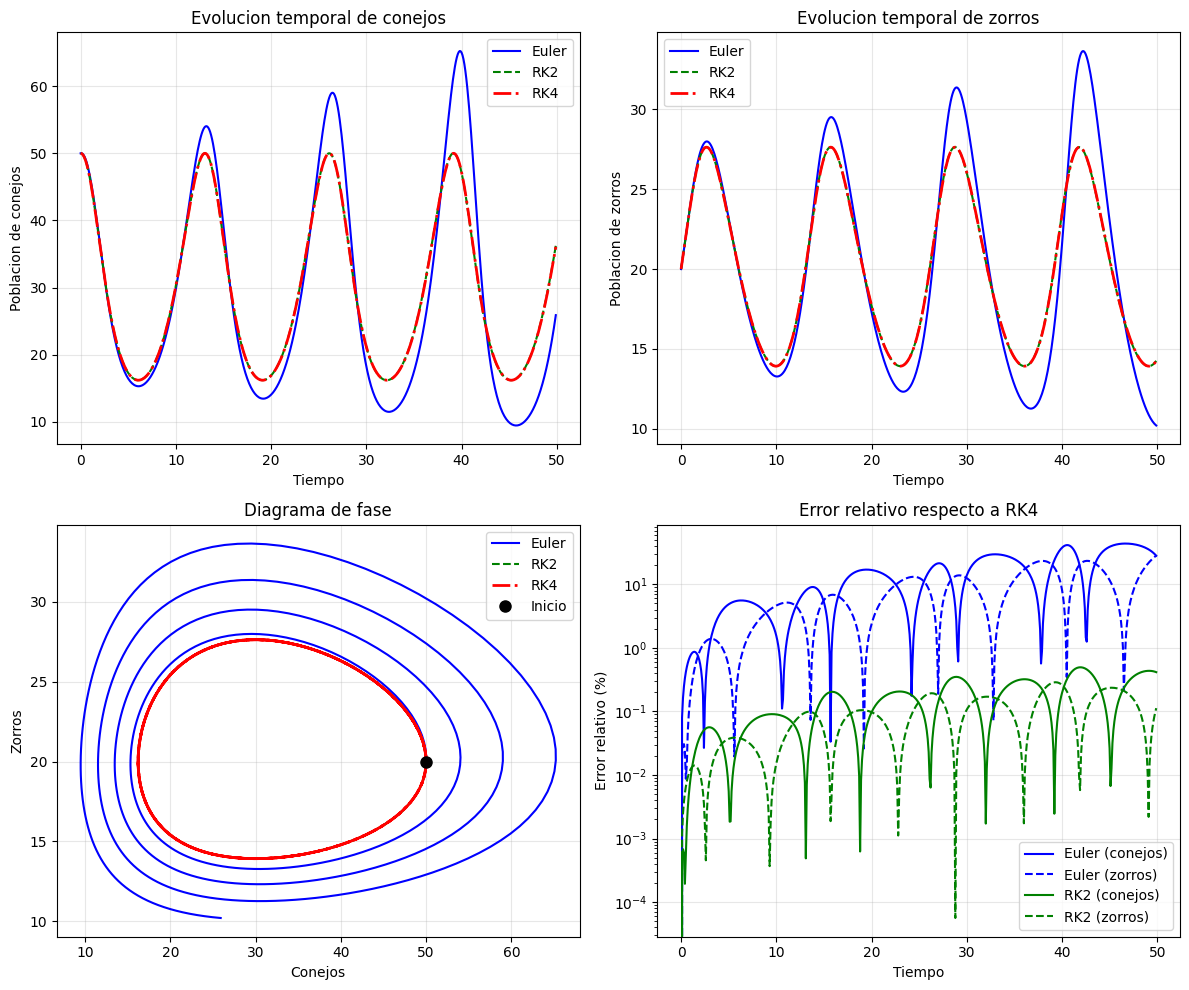

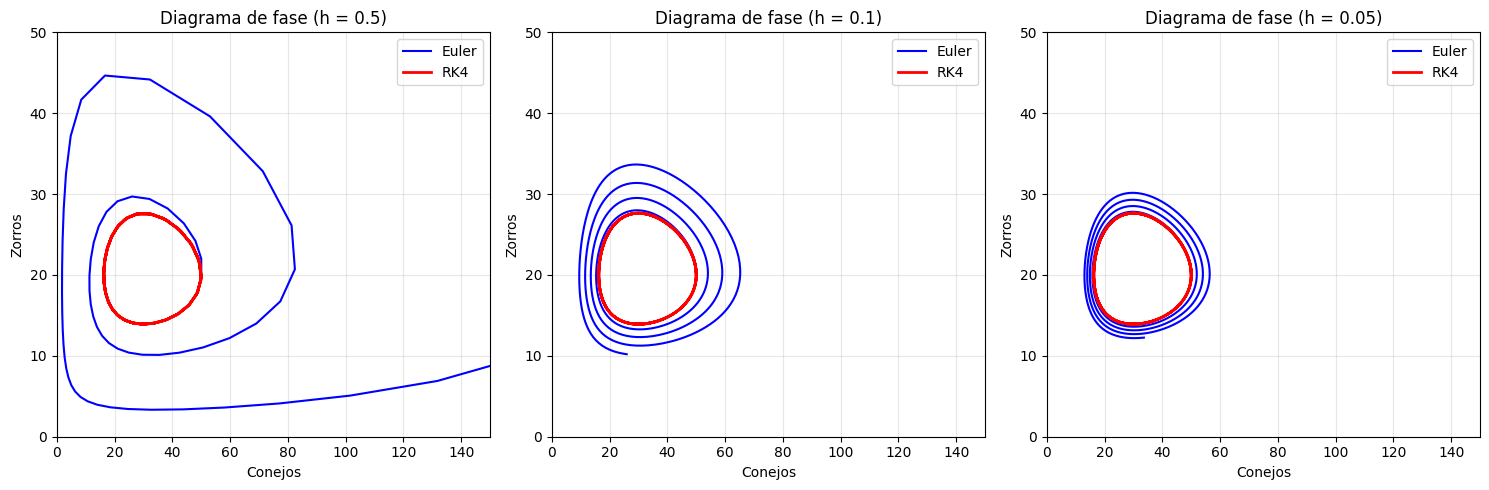

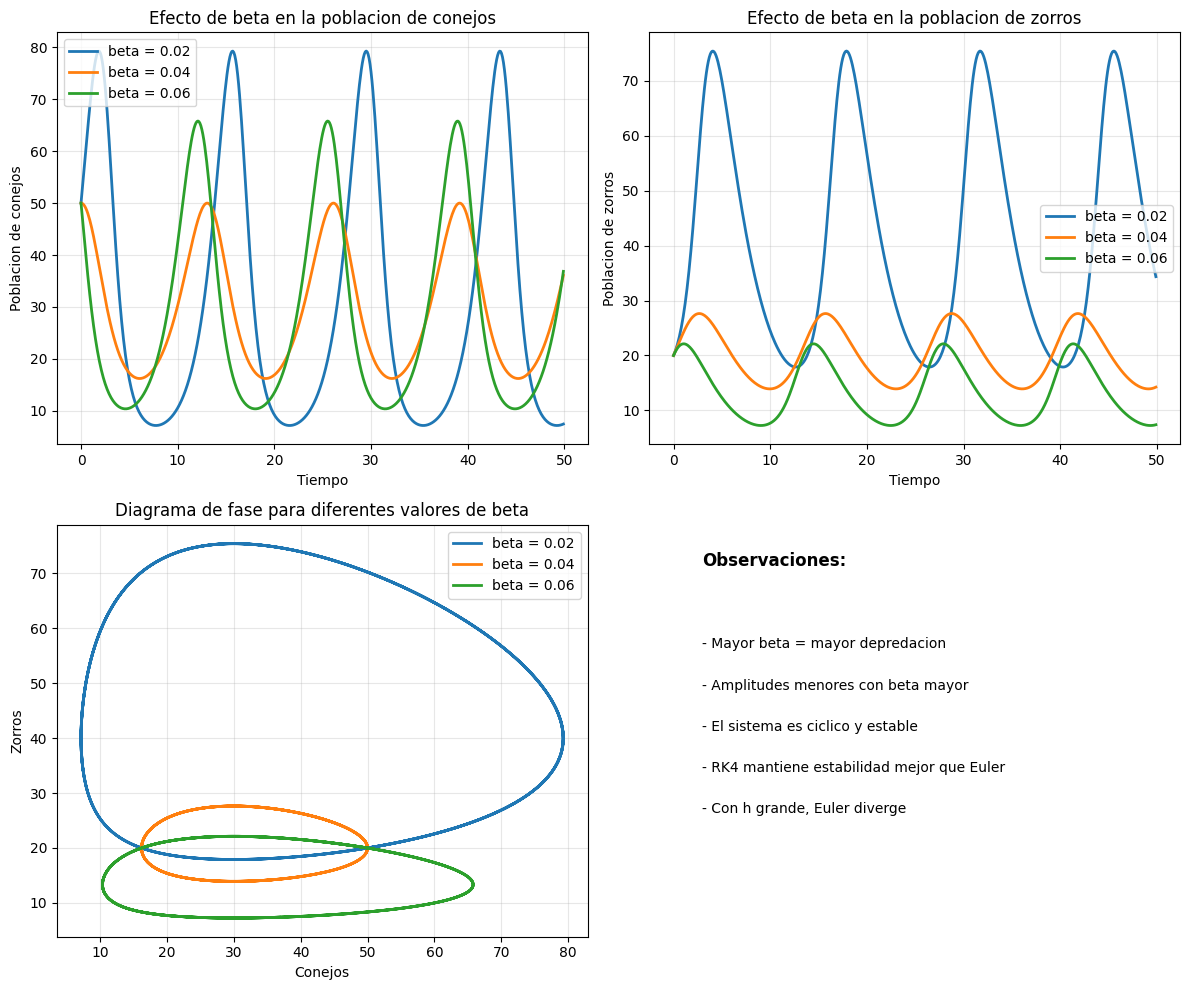

Estadisticas del error relativo promedio (%):
Euler vs RK4 - Conejos: 15.32%
Euler vs RK4 - Zorros: 8.17%
RK2 vs RK4 - Conejos: 0.17%
RK2 vs RK4 - Zorros: 0.10%


In [9]:
# Parametros del sistema
alpha = 0.8   # tasa de reproduccion de conejos
beta = 0.04   # tasa de depredacion
gamma = 0.3   # tasa de mortalidad de zorros
delta = 0.01  # eficiencia de conversion

# Condiciones iniciales
x0 = 50  # conejos iniciales
y0 = 20  # zorros iniciales

# Sistema de ecuaciones diferenciales
def sistema_lotka_volterra(t, estado, alpha, beta, gamma, delta):
    x, y = estado
    dx_dt = alpha * x - beta * x * y
    dy_dt = -gamma * y + delta * x * y
    return np.array([dx_dt, dy_dt])

# Metodo de Euler
def euler(f, t0, tf, estado0, h, params):
    num_pasos = int((tf - t0) / h)
    tiempo = np.zeros(num_pasos)
    x = np.zeros(num_pasos)
    y = np.zeros(num_pasos)

    tiempo[0] = t0
    x[0] = estado0[0]
    y[0] = estado0[1]

    for i in range(1, num_pasos):
        tiempo[i] = tiempo[i-1] + h
        estado = np.array([x[i-1], y[i-1]])
        derivadas = f(tiempo[i-1], estado, *params)
        x[i] = x[i-1] + h * derivadas[0]
        y[i] = y[i-1] + h * derivadas[1]

    return tiempo, x, y

# Metodo de Runge-Kutta de segundo orden (punto medio)
def rk2(f, t0, tf, estado0, h, params):
    num_pasos = int((tf - t0) / h)
    tiempo = np.zeros(num_pasos)
    x = np.zeros(num_pasos)
    y = np.zeros(num_pasos)

    tiempo[0] = t0
    x[0] = estado0[0]
    y[0] = estado0[1]

    for i in range(1, num_pasos):
        t = tiempo[i-1]
        estado = np.array([x[i-1], y[i-1]])

        k1 = f(t, estado, *params)
        k2 = f(t + h/2, estado + k1*h/2, *params)

        tiempo[i] = t + h
        estado_nuevo = estado + h * k2
        x[i] = estado_nuevo[0]
        y[i] = estado_nuevo[1]

    return tiempo, x, y

# Metodo de Runge-Kutta de cuarto orden
def rk4(f, t0, tf, estado0, h, params):
    num_pasos = int((tf - t0) / h)
    tiempo = np.zeros(num_pasos)
    x = np.zeros(num_pasos)
    y = np.zeros(num_pasos)

    tiempo[0] = t0
    x[0] = estado0[0]
    y[0] = estado0[1]

    for i in range(1, num_pasos):
        t = tiempo[i-1]
        estado = np.array([x[i-1], y[i-1]])

        k1 = f(t, estado, *params)
        k2 = f(t + h/2, estado + k1*h/2, *params)
        k3 = f(t + h/2, estado + k2*h/2, *params)
        k4 = f(t + h, estado + k3*h, *params)

        tiempo[i] = t + h
        estado_nuevo = estado + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
        x[i] = estado_nuevo[0]
        y[i] = estado_nuevo[1]

    return tiempo, x, y

# Parametros de simulacion
t_inicial = 0
t_final = 50
h = 0.1
estado_inicial = np.array([x0, y0])
params = (alpha, beta, gamma, delta)

# a) y b) Resolver con los tres metodos
print("Resolviendo con h = 0.1...")
t_euler, x_euler, y_euler = euler(sistema_lotka_volterra, t_inicial, t_final, estado_inicial, h, params)
t_rk2, x_rk2, y_rk2 = rk2(sistema_lotka_volterra, t_inicial, t_final, estado_inicial, h, params)
t_rk4, x_rk4, y_rk4 = rk4(sistema_lotka_volterra, t_inicial, t_final, estado_inicial, h, params)

# c) Comparacion de resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Evolucion temporal de conejos
axes[0, 0].plot(t_euler, x_euler, 'b-', label='Euler', linewidth=1.5)
axes[0, 0].plot(t_rk2, x_rk2, 'g--', label='RK2', linewidth=1.5)
axes[0, 0].plot(t_rk4, x_rk4, 'r-.', label='RK4', linewidth=2)
axes[0, 0].set_xlabel('Tiempo')
axes[0, 0].set_ylabel('Poblacion de conejos')
axes[0, 0].set_title('Evolucion temporal de conejos')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Evolucion temporal de zorros
axes[0, 1].plot(t_euler, y_euler, 'b-', label='Euler', linewidth=1.5)
axes[0, 1].plot(t_rk2, y_rk2, 'g--', label='RK2', linewidth=1.5)
axes[0, 1].plot(t_rk4, y_rk4, 'r-.', label='RK4', linewidth=2)
axes[0, 1].set_xlabel('Tiempo')
axes[0, 1].set_ylabel('Poblacion de zorros')
axes[0, 1].set_title('Evolucion temporal de zorros')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Diagrama de fase
axes[1, 0].plot(x_euler, y_euler, 'b-', label='Euler', linewidth=1.5)
axes[1, 0].plot(x_rk2, y_rk2, 'g--', label='RK2', linewidth=1.5)
axes[1, 0].plot(x_rk4, y_rk4, 'r-.', label='RK4', linewidth=2)
axes[1, 0].plot(x0, y0, 'ko', markersize=8, label='Inicio')
axes[1, 0].set_xlabel('Conejos')
axes[1, 0].set_ylabel('Zorros')
axes[1, 0].set_title('Diagrama de fase')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Error relativo (usando RK4 como referencia)
# Interpolar para tener los mismos puntos de tiempo
error_euler_x = np.abs(x_euler - x_rk4) / np.maximum(x_rk4, 1) * 100
error_euler_y = np.abs(y_euler - y_rk4) / np.maximum(y_rk4, 1) * 100
error_rk2_x = np.abs(x_rk2 - x_rk4) / np.maximum(x_rk4, 1) * 100
error_rk2_y = np.abs(y_rk2 - y_rk4) / np.maximum(y_rk4, 1) * 100

axes[1, 1].semilogy(t_euler, error_euler_x, 'b-', label='Euler (conejos)', linewidth=1.5)
axes[1, 1].semilogy(t_euler, error_euler_y, 'b--', label='Euler (zorros)', linewidth=1.5)
axes[1, 1].semilogy(t_rk2, error_rk2_x, 'g-', label='RK2 (conejos)', linewidth=1.5)
axes[1, 1].semilogy(t_rk2, error_rk2_y, 'g--', label='RK2 (zorros)', linewidth=1.5)
axes[1, 1].set_xlabel('Tiempo')
axes[1, 1].set_ylabel('Error relativo (%)')
axes[1, 1].set_title('Error relativo respecto a RK4')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# d) Analisis de estabilidad con diferentes pasos temporales
pasos_h = [0.5, 0.1, 0.05]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, h_test in enumerate(pasos_h):
    t_euler_h, x_euler_h, y_euler_h = euler(sistema_lotka_volterra, t_inicial, t_final, estado_inicial, h_test, params)
    t_rk4_h, x_rk4_h, y_rk4_h = rk4(sistema_lotka_volterra, t_inicial, t_final, estado_inicial, h_test, params)

    axes[idx].plot(x_euler_h, y_euler_h, 'b-', label='Euler', linewidth=1.5)
    axes[idx].plot(x_rk4_h, y_rk4_h, 'r-', label='RK4', linewidth=2)
    axes[idx].set_xlabel('Conejos')
    axes[idx].set_ylabel('Zorros')
    axes[idx].set_title(f'Diagrama de fase (h = {h_test})')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_xlim(0, 150)
    axes[idx].set_ylim(0, 50)

plt.tight_layout()
plt.show()

# e) Variacion de parametros - explorando diferentes valores de beta
betas = [0.02, 0.04, 0.06]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for beta_test in betas:
    params_test = (alpha, beta_test, gamma, delta)
    t_sim, x_sim, y_sim = rk4(sistema_lotka_volterra, t_inicial, t_final, estado_inicial, 0.1, params_test)

    # Poblacion de conejos
    axes[0, 0].plot(t_sim, x_sim, label=f'beta = {beta_test}', linewidth=2)

    # Poblacion de zorros
    axes[0, 1].plot(t_sim, y_sim, label=f'beta = {beta_test}', linewidth=2)

    # Diagrama de fase
    axes[1, 0].plot(x_sim, y_sim, label=f'beta = {beta_test}', linewidth=2)

# Configurar graficas
axes[0, 0].set_xlabel('Tiempo')
axes[0, 0].set_ylabel('Poblacion de conejos')
axes[0, 0].set_title('Efecto de beta en la poblacion de conejos')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_xlabel('Tiempo')
axes[0, 1].set_ylabel('Poblacion de zorros')
axes[0, 1].set_title('Efecto de beta en la poblacion de zorros')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].set_xlabel('Conejos')
axes[1, 0].set_ylabel('Zorros')
axes[1, 0].set_title('Diagrama de fase para diferentes valores de beta')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Analisis del periodo de oscilacion
axes[1, 1].text(0.1, 0.9, 'Observaciones:', transform=axes[1, 1].transAxes, fontsize=12, fontweight='bold')
axes[1, 1].text(0.1, 0.7, '- Mayor beta = mayor depredacion', transform=axes[1, 1].transAxes, fontsize=10)
axes[1, 1].text(0.1, 0.6, '- Amplitudes menores con beta mayor', transform=axes[1, 1].transAxes, fontsize=10)
axes[1, 1].text(0.1, 0.5, '- El sistema es ciclico y estable', transform=axes[1, 1].transAxes, fontsize=10)
axes[1, 1].text(0.1, 0.4, '- RK4 mantiene estabilidad mejor que Euler', transform=axes[1, 1].transAxes, fontsize=10)
axes[1, 1].text(0.1, 0.3, '- Con h grande, Euler diverge', transform=axes[1, 1].transAxes, fontsize=10)
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Imprimir estadisticas
print("Estadisticas del error relativo promedio (%):")
print(f"Euler vs RK4 - Conejos: {np.mean(error_euler_x):.2f}%")
print(f"Euler vs RK4 - Zorros: {np.mean(error_euler_y):.2f}%")
print(f"RK2 vs RK4 - Conejos: {np.mean(error_rk2_x):.2f}%")
print(f"RK2 vs RK4 - Zorros: {np.mean(error_rk2_y):.2f}%")

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


Caso 1: Oscilador libre con diferentes amortiguamientos


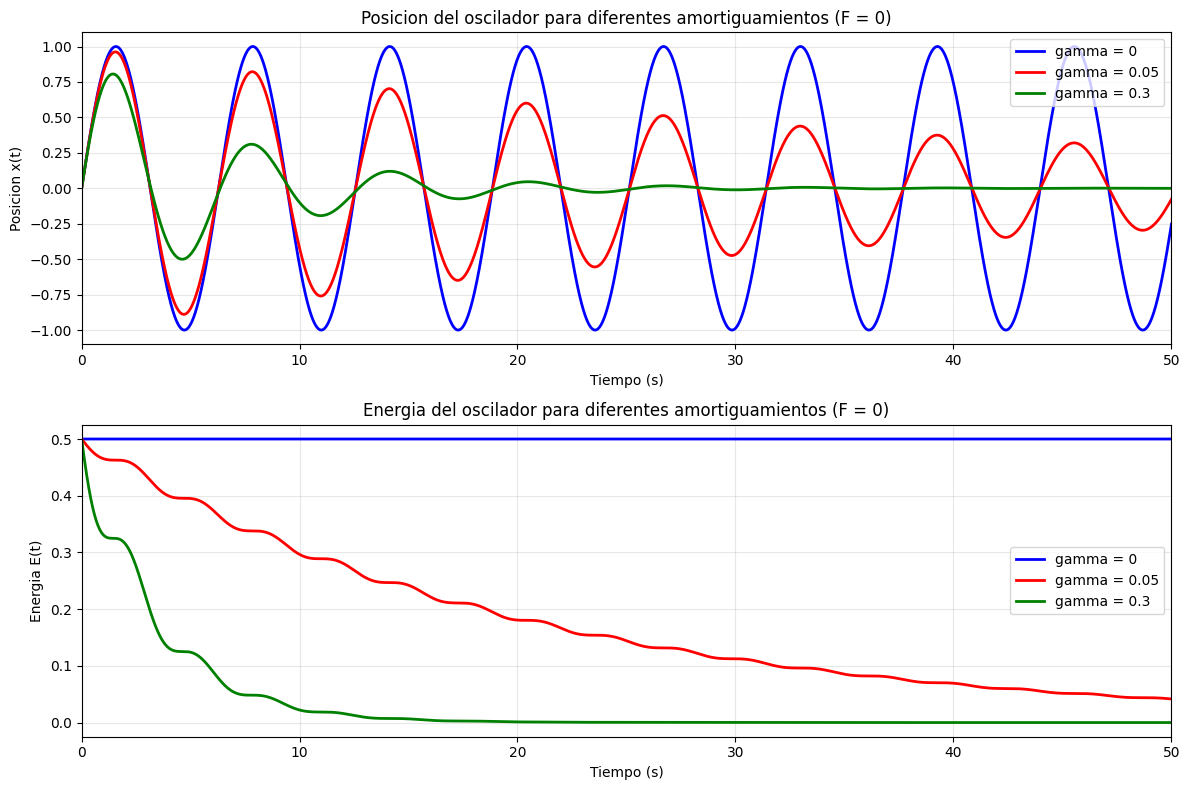

Caso 2: Oscilador sin amortiguamiento con fuerza variable


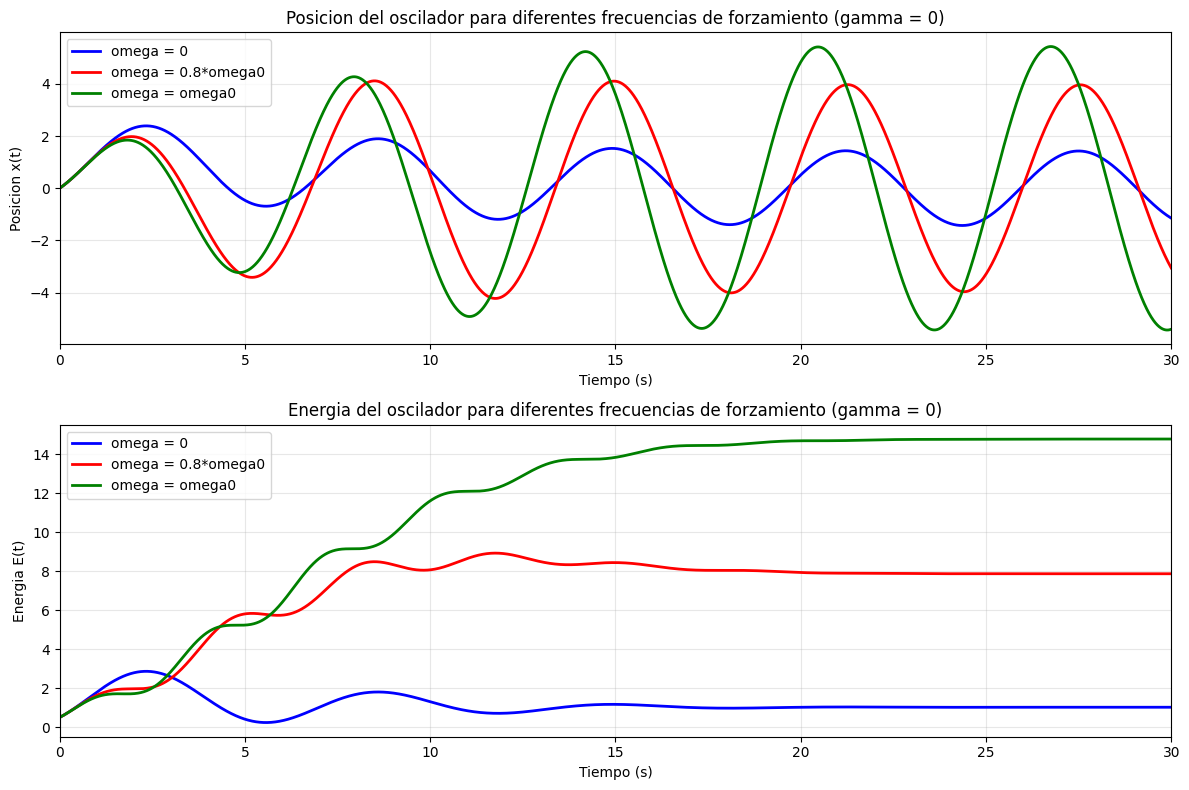

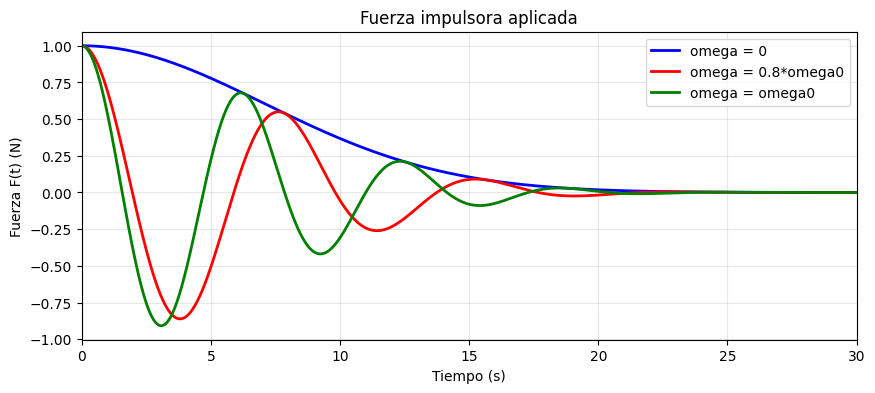

Analisis de resultados:
Caso 1 - Oscilador libre:
- gamma = 0: Oscilacion perpetua, energia constante
- gamma = 0.05: Amortiguamiento debil, decaimiento exponencial
- gamma = 0.3: Amortiguamiento fuerte, decaimiento rapido
Caso 2 - Oscilador forzado:
- omega = 0: Impulso constante que decae
- omega = 0.8*omega0: Cerca de resonancia, amplitud moderada
- omega = omega0: Resonancia exacta, maxima transferencia de energia


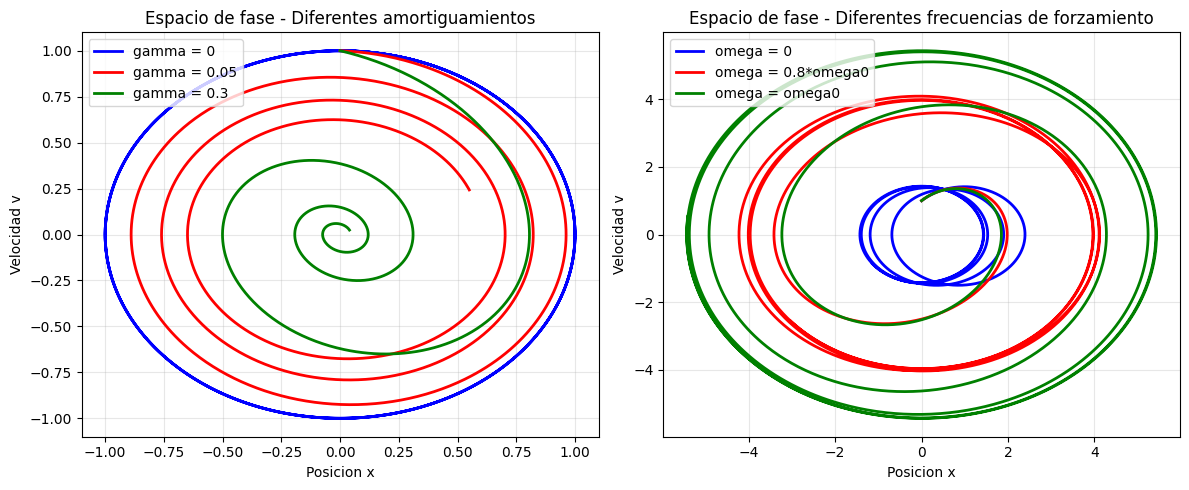

In [11]:
# Parametros del sistema
m = 1.0  # masa
k = 1.0  # constante del resorte
omega0 = np.sqrt(k/m)  # frecuencia angular natural

# Condiciones iniciales
x0 = 0
v0 = 1

# Sistema de ecuaciones diferenciales
def oscilador_amortiguado(t, estado, gamma, F_func):
    x, v = estado
    F = F_func(t)
    dx_dt = v
    dv_dt = F/m - gamma * v - omega0**2 * x
    return np.array([dx_dt, dv_dt])

# Metodo de Runge-Kutta 4
def rk4_oscilador(gamma, F_func, t_final, dt):
    num_pasos = int(t_final / dt)
    tiempo = np.zeros(num_pasos)
    x = np.zeros(num_pasos)
    v = np.zeros(num_pasos)

    # Condiciones iniciales
    tiempo[0] = 0
    x[0] = x0
    v[0] = v0

    for i in range(1, num_pasos):
        t = tiempo[i-1]
        estado = np.array([x[i-1], v[i-1]])

        k1 = oscilador_amortiguado(t, estado, gamma, F_func)
        k2 = oscilador_amortiguado(t + dt/2, estado + k1*dt/2, gamma, F_func)
        k3 = oscilador_amortiguado(t + dt/2, estado + k2*dt/2, gamma, F_func)
        k4 = oscilador_amortiguado(t + dt, estado + k3*dt, gamma, F_func)

        estado_nuevo = estado + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

        tiempo[i] = t + dt
        x[i] = estado_nuevo[0]
        v[i] = estado_nuevo[1]

    return tiempo, x, v

# Funcion para calcular energia
def calcular_energia(x, v):
    energia_cinetica = 0.5 * m * v**2
    energia_potencial = 0.5 * k * x**2
    return energia_cinetica + energia_potencial

# Parametros de simulacion
t_final = 100
dt = 0.01

# Caso 1: F = 0, diferentes valores de gamma
print("Caso 1: Oscilador libre con diferentes amortiguamientos")
gammas = [0, 0.05, 0.3]
colores = ['blue', 'red', 'green']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

for gamma, color in zip(gammas, colores):
    # Fuerza nula
    F_nula = lambda t: 0

    # Resolver
    tiempo, x, v = rk4_oscilador(gamma, F_nula, t_final, dt)

    # Calcular energia
    energia = calcular_energia(x, v)

    # Graficar posicion
    ax1.plot(tiempo, x, color=color, linewidth=2, label=f'gamma = {gamma}')

    # Graficar energia
    ax2.plot(tiempo, energia, color=color, linewidth=2, label=f'gamma = {gamma}')

ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Posicion x(t)')
ax1.set_title('Posicion del oscilador para diferentes amortiguamientos (F = 0)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 50)

ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Energia E(t)')
ax2.set_title('Energia del oscilador para diferentes amortiguamientos (F = 0)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 50)

plt.tight_layout()
plt.show()

# Caso 2: gamma = 0, fuerza variable
print("Caso 2: Oscilador sin amortiguamiento con fuerza variable")
gamma = 0
F0 = 1.0  # N
T = 10.0  # s
omegas = [0, 0.8*omega0, omega0]
etiquetas = ['omega = 0', 'omega = 0.8*omega0', 'omega = omega0']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

for omega, color, etiqueta in zip(omegas, colores, etiquetas):
    # Definir fuerza impulsora
    def F_impulsora(t):
        return F0 * np.cos(omega * t) * np.exp(-t**2 / T**2)

    # Resolver
    tiempo, x, v = rk4_oscilador(gamma, F_impulsora, t_final, dt)

    # Calcular energia
    energia = calcular_energia(x, v)

    # Graficar posicion
    ax1.plot(tiempo, x, color=color, linewidth=2, label=etiqueta)

    # Graficar energia
    ax2.plot(tiempo, energia, color=color, linewidth=2, label=etiqueta)

ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Posicion x(t)')
ax1.set_title('Posicion del oscilador para diferentes frecuencias de forzamiento (gamma = 0)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 30)

ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Energia E(t)')
ax2.set_title('Energia del oscilador para diferentes frecuencias de forzamiento (gamma = 0)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 30)

plt.tight_layout()
plt.show()

# Analisis adicional: mostrar la fuerza aplicada
fig, ax = plt.subplots(figsize=(10, 4))
tiempo_fuerza = np.linspace(0, 30, 1000)

for omega, color, etiqueta in zip(omegas, colores, etiquetas):
    F_valores = F0 * np.cos(omega * tiempo_fuerza) * np.exp(-tiempo_fuerza**2 / T**2)
    ax.plot(tiempo_fuerza, F_valores, color=color, linewidth=2, label=etiqueta)

ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Fuerza F(t) (N)')
ax.set_title('Fuerza impulsora aplicada')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 30)
plt.show()

# Analisis de resonancia
print("Analisis de resultados:")
print("Caso 1 - Oscilador libre:")
print("- gamma = 0: Oscilacion perpetua, energia constante")
print("- gamma = 0.05: Amortiguamiento debil, decaimiento exponencial")
print("- gamma = 0.3: Amortiguamiento fuerte, decaimiento rapido")

print("Caso 2 - Oscilador forzado:")
print("- omega = 0: Impulso constante que decae")
print("- omega = 0.8*omega0: Cerca de resonancia, amplitud moderada")
print("- omega = omega0: Resonancia exacta, maxima transferencia de energia")

# Grafica comparativa de espacios de fase
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Espacio de fase para diferentes amortiguamientos
axes[0].set_title('Espacio de fase - Diferentes amortiguamientos')
for gamma, color in zip(gammas, colores):
    F_nula = lambda t: 0
    tiempo, x, v = rk4_oscilador(gamma, F_nula, 20, dt)
    axes[0].plot(x, v, color=color, linewidth=2, label=f'gamma = {gamma}')
axes[0].set_xlabel('Posicion x')
axes[0].set_ylabel('Velocidad v')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Espacio de fase para diferentes frecuencias de forzamiento
axes[1].set_title('Espacio de fase - Diferentes frecuencias de forzamiento')
for omega, color, etiqueta in zip(omegas, colores, etiquetas):
    def F_impulsora(t):
        return F0 * np.cos(omega * t) * np.exp(-t**2 / T**2)
    tiempo, x, v = rk4_oscilador(0, F_impulsora, 30, dt)
    axes[1].plot(x, v, color=color, linewidth=2, label=etiqueta)
axes[1].set_xlabel('Posicion x')
axes[1].set_ylabel('Velocidad v')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa. 

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh** 
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

Analisis de estabilidad de los puntos de Lagrange L4 y L5
Valor critico de mu: 0.001000
Criterio de Routh: mu_c = 0.03852
Diferencia: 0.037520
mu = 0.0100:
  L4 estable: False
  L5 estable: False
  Valores propios L4: [ 1.66533454e-16+2.1453587j  1.66533454e-16-2.1453587j
  7.76249928e-01+0.j        -7.76249928e-01+0.j       ]
mu = 0.0300:
  L4 estable: True
  L5 estable: True
  Valores propios L4: [-5.55111512e-17+2.82442152j -5.55111512e-17-2.82442152j
 -4.16333634e-16+0.68083417j -4.16333634e-16-0.68083417j]
mu = 0.0385:
  L4 estable: False
  L5 estable: False
  Valores propios L4: [-1.48684215+0.93809941j -1.48684215-0.93809941j  1.48684215+0.93809941j
  1.48684215-0.93809941j]
mu = 0.0400:
  L4 estable: False
  L5 estable: False
  Valores propios L4: [ 2.77555756e-16+2.50391608j  2.77555756e-16-2.50391608j
  2.21697331e-01+0.j         -2.21697331e-01+0.j        ]
mu = 0.1000:
  L4 estable: False
  L5 estable: False
  Valores propios L4: [ 1.66533454e-16+2.1453587j  1.66533454e-16-

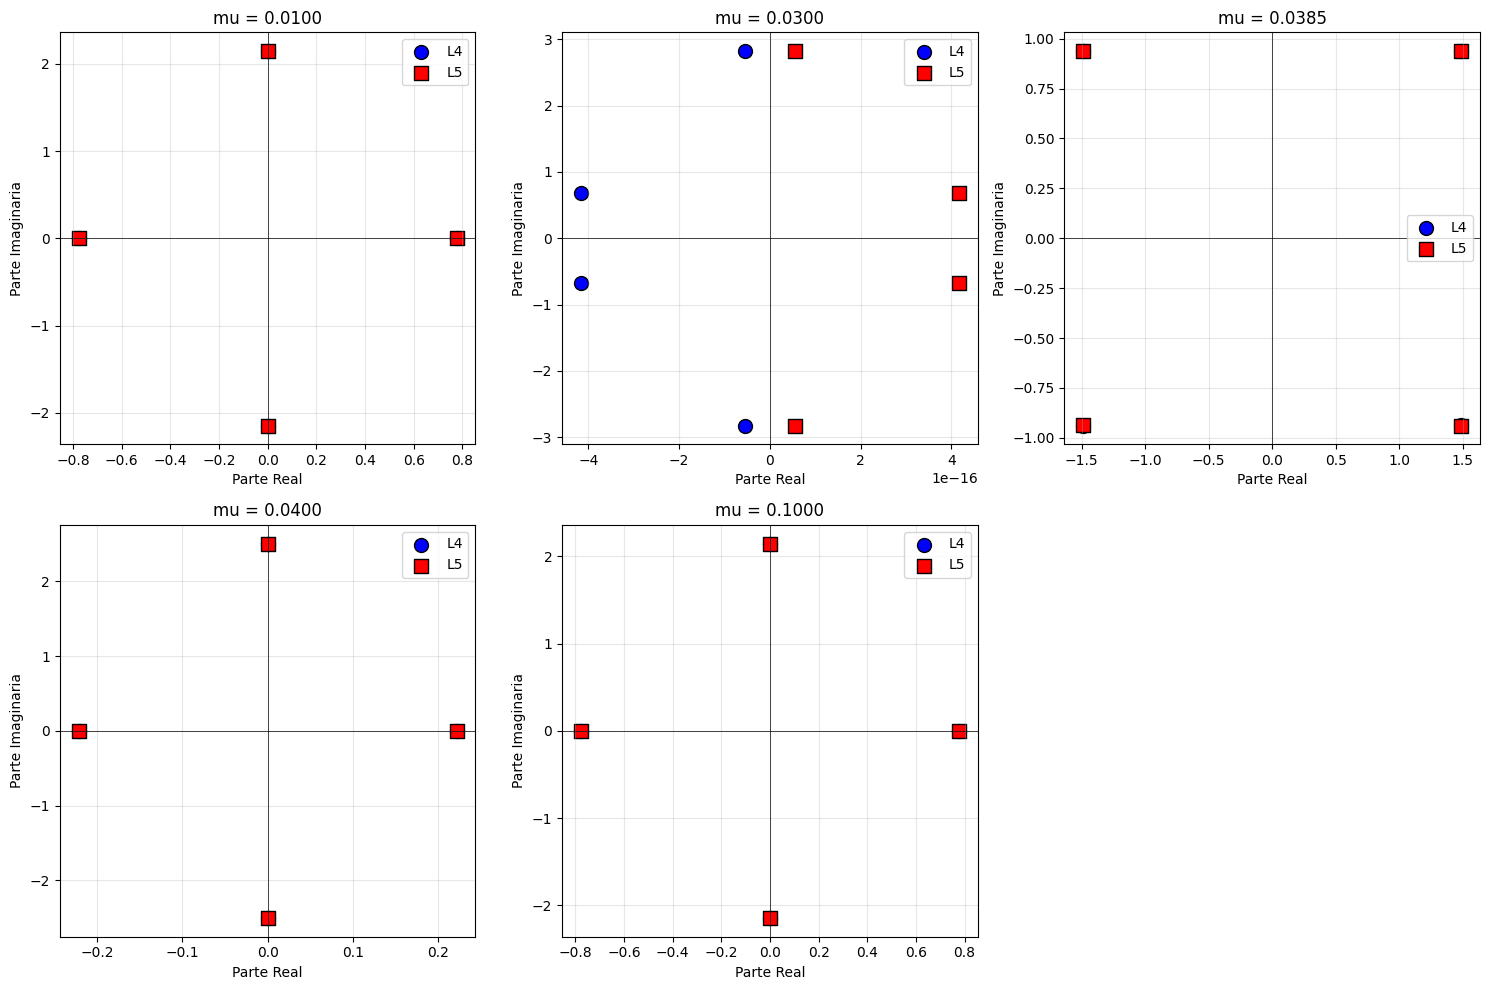

Casos especificos del Sistema Solar
Sistema Sol-Tierra:
  mu = 0.00000300
  L4/L5 estables: False
  Valores propios: [-1.46082906+0.89629932j -1.46082906-0.89629932j  1.46082906+0.89629932j
  1.46082906-0.89629932j]
Sistema Sol-Jupiter:
  mu = 0.00095339
  L4/L5 estables: False
  Valores propios: [ 3.33066907e-16+2.53232282j  3.33066907e-16-2.53232282j
  4.38420811e-01+0.j         -4.38420811e-01+0.j        ]


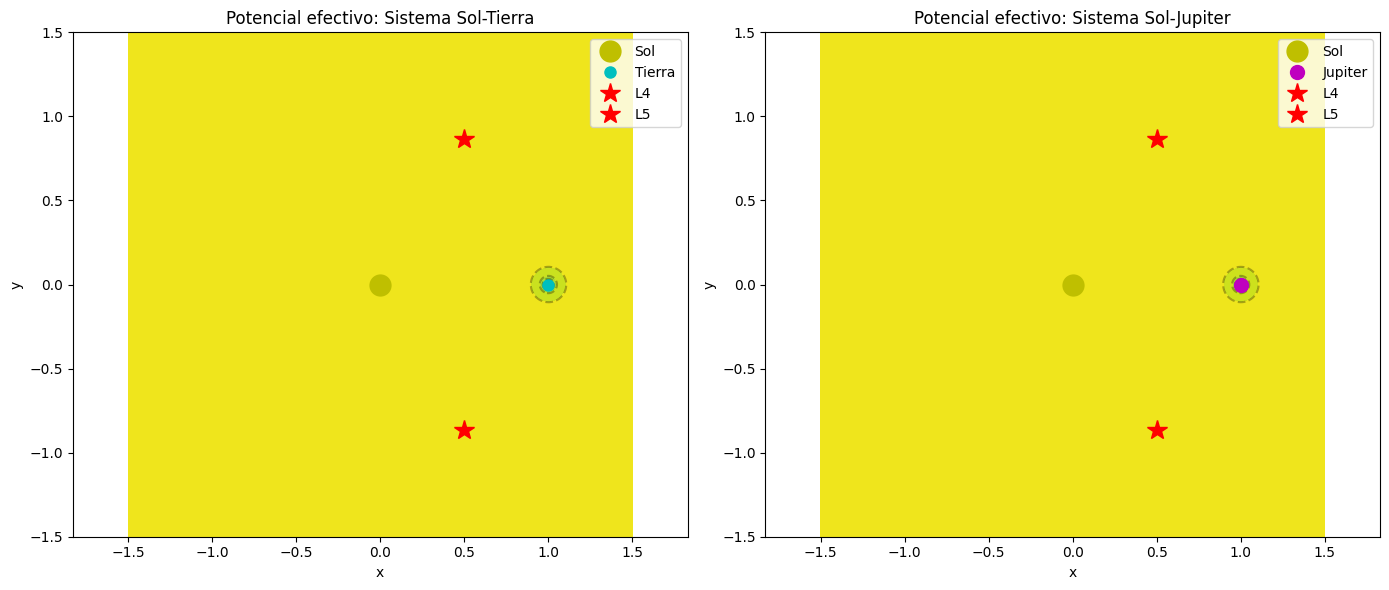

Conclusiones:
- Los puntos L4 y L5 son estables solo cuando mu < mu_c ≈ 0.03852
- En el sistema Sol-Tierra, L4 y L5 son estables (mu muy pequeno)
- En el sistema Sol-Jupiter, L4 y L5 son estables (mu < mu_c)
- Esto explica la existencia de asteroides troyanos en L4 y L5 de Jupiter


In [14]:
# Definir el potencial efectivo U
def potencial_efectivo(x, y, mu):
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)
    # Evitar division por cero
    r1 = np.maximum(r1, 1e-10)
    r2 = np.maximum(r2, 1e-10)
    U = -mu/r1 - (1-mu)/r2 - 0.5*(x**2 + y**2)
    return U

# Calcular las derivadas parciales del potencial
def derivadas_potencial(x, y, mu):
    h = 1e-8  # paso para derivada numerica

    # Primera derivada
    dU_dx = (potencial_efectivo(x+h, y, mu) - potencial_efectivo(x-h, y, mu))/(2*h)
    dU_dy = (potencial_efectivo(x, y+h, mu) - potencial_efectivo(x, y-h, mu))/(2*h)

    # Segunda derivada
    d2U_dx2 = (potencial_efectivo(x+h, y, mu) - 2*potencial_efectivo(x, y, mu) + potencial_efectivo(x-h, y, mu))/(h**2)
    d2U_dy2 = (potencial_efectivo(x, y+h, mu) - 2*potencial_efectivo(x, y, mu) + potencial_efectivo(x, y-h, mu))/(h**2)
    d2U_dxdy = (potencial_efectivo(x+h, y+h, mu) - potencial_efectivo(x+h, y-h, mu) -
                potencial_efectivo(x-h, y+h, mu) + potencial_efectivo(x-h, y-h, mu))/(4*h**2)

    return dU_dx, dU_dy, d2U_dx2, d2U_dy2, d2U_dxdy

# Construir la matriz A para el sistema linealizado
def matriz_estabilidad(punto_lagrange, mu):
    x_L, y_L = punto_lagrange
    omega = 1  # sistema normalizado

    # Calcular segundas derivadas en el punto de Lagrange
    _, _, d2U_dx2, d2U_dy2, d2U_dxdy = derivadas_potencial(x_L, y_L, mu)

    # Construir matriz A
    A = np.array([
        [0, 1, 0, 0],
        [d2U_dx2, 0, d2U_dxdy, 2*omega],
        [0, 0, 0, 1],
        [d2U_dxdy, -2*omega, d2U_dy2, 0]
    ])

    return A

# Analizar estabilidad
def analizar_estabilidad(valores_propios):
    # Verificar si todos los valores propios son imaginarios puros
    estable = True
    for lambda_i in valores_propios:
        if np.abs(np.real(lambda_i)) > 1e-10:  # componente real significativa
            estable = False
            break
    return estable

# Encontrar el valor critico de mu
def encontrar_mu_critico():
    mu_valores = np.linspace(0.001, 0.1, 1000)
    mu_critico = None

    for mu in mu_valores:
        # Coordenadas de L4
        x_L4 = 0.5 - mu
        y_L4 = np.sqrt(3)/2

        # Matriz de estabilidad
        A = matriz_estabilidad((x_L4, y_L4), mu)

        # Valores propios
        valores_propios = np.linalg.eigvals(A)

        # Verificar estabilidad
        if not analizar_estabilidad(valores_propios):
            mu_critico = mu
            break

    return mu_critico

# Analisis principal
print("Analisis de estabilidad de los puntos de Lagrange L4 y L5")
print("="*60)

# Encontrar mu critico
mu_critico = encontrar_mu_critico()
print(f"Valor critico de mu: {mu_critico:.6f}")
print(f"Criterio de Routh: mu_c = 0.03852")
print(f"Diferencia: {abs(mu_critico - 0.03852):.6f}")

# Analizar estabilidad para diferentes valores de mu
mu_valores = [0.01, 0.03, 0.0385, 0.04, 0.1]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, mu in enumerate(mu_valores):
    # Coordenadas de L4 y L5
    x_L4 = 0.5 - mu
    y_L4 = np.sqrt(3)/2
    x_L5 = 0.5 - mu
    y_L5 = -np.sqrt(3)/2

    # Matriz para L4
    A_L4 = matriz_estabilidad((x_L4, y_L4), mu)
    valores_propios_L4 = np.linalg.eigvals(A_L4)

    # Graficar valores propios en el plano complejo
    ax = axes[idx]
    ax.scatter(np.real(valores_propios_L4), np.imag(valores_propios_L4),
               s=100, c='blue', marker='o', label='L4', edgecolors='black')

    # Matriz para L5
    A_L5 = matriz_estabilidad((x_L5, y_L5), mu)
    valores_propios_L5 = np.linalg.eigvals(A_L5)

    ax.scatter(np.real(valores_propios_L5), np.imag(valores_propios_L5),
               s=100, c='red', marker='s', label='L5', edgecolors='black')

    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imaginaria')
    ax.set_title(f'mu = {mu:.4f}')
    ax.legend()

    # Determinar estabilidad
    estable_L4 = analizar_estabilidad(valores_propios_L4)
    estable_L5 = analizar_estabilidad(valores_propios_L5)

    print(f"mu = {mu:.4f}:")
    print(f"  L4 estable: {estable_L4}")
    print(f"  L5 estable: {estable_L5}")
    print(f"  Valores propios L4: {valores_propios_L4}")

# Ocultar el ultimo subplot vacio
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Casos especificos: Sol-Tierra y Sol-Jupiter
print("="*60)
print("Casos especificos del Sistema Solar")
print("="*60)

# Masas en unidades solares
masa_sol = 1.0
masa_tierra = 3.003e-6
masa_jupiter = 9.543e-4

# Sistema Sol-Tierra
mu_tierra = masa_tierra / (masa_sol + masa_tierra)
print(f"Sistema Sol-Tierra:")
print(f"  mu = {mu_tierra:.8f}")

# Analizar L4 para Sol-Tierra
x_L4_tierra = 0.5 - mu_tierra
y_L4_tierra = np.sqrt(3)/2
A_tierra = matriz_estabilidad((x_L4_tierra, y_L4_tierra), mu_tierra)
valores_propios_tierra = np.linalg.eigvals(A_tierra)
estable_tierra = analizar_estabilidad(valores_propios_tierra)

print(f"  L4/L5 estables: {estable_tierra}")
print(f"  Valores propios: {valores_propios_tierra}")

# Sistema Sol-Jupiter
mu_jupiter = masa_jupiter / (masa_sol + masa_jupiter)
print(f"Sistema Sol-Jupiter:")
print(f"  mu = {mu_jupiter:.8f}")

# Analizar L4 para Sol-Jupiter
x_L4_jupiter = 0.5 - mu_jupiter
y_L4_jupiter = np.sqrt(3)/2
A_jupiter = matriz_estabilidad((x_L4_jupiter, y_L4_jupiter), mu_jupiter)
valores_propios_jupiter = np.linalg.eigvals(A_jupiter)
estable_jupiter = analizar_estabilidad(valores_propios_jupiter)

print(f"  L4/L5 estables: {estable_jupiter}")
print(f"  Valores propios: {valores_propios_jupiter}")

# Grafica del potencial efectivo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Sol-Tierra
x = np.linspace(-1.5, 1.5, 300)
y = np.linspace(-1.5, 1.5, 300)
X, Y = np.meshgrid(x, y)
Z_tierra = potencial_efectivo(X, Y, mu_tierra)

contour1 = ax1.contour(X, Y, Z_tierra, levels=20, colors='black', alpha=0.3)
ax1.contourf(X, Y, Z_tierra, levels=20, cmap='viridis')
ax1.plot(-mu_tierra, 0, 'yo', markersize=15, label='Sol')
ax1.plot(1-mu_tierra, 0, 'co', markersize=8, label='Tierra')
ax1.plot(x_L4_tierra, y_L4_tierra, 'r*', markersize=15, label='L4')
ax1.plot(x_L4_tierra, -y_L4_tierra, 'r*', markersize=15, label='L5')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Potencial efectivo: Sistema Sol-Tierra')
ax1.legend()
ax1.axis('equal')

# Sol-Jupiter
Z_jupiter = potencial_efectivo(X, Y, mu_jupiter)

contour2 = ax2.contour(X, Y, Z_jupiter, levels=20, colors='black', alpha=0.3)
ax2.contourf(X, Y, Z_jupiter, levels=20, cmap='viridis')
ax2.plot(-mu_jupiter, 0, 'yo', markersize=15, label='Sol')
ax2.plot(1-mu_jupiter, 0, 'mo', markersize=10, label='Jupiter')
ax2.plot(x_L4_jupiter, y_L4_jupiter, 'r*', markersize=15, label='L4')
ax2.plot(x_L4_jupiter, -y_L4_jupiter, 'r*', markersize=15, label='L5')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Potencial efectivo: Sistema Sol-Jupiter')
ax2.legend()
ax2.axis('equal')

plt.tight_layout()
plt.show()

print("Conclusiones:")
print("- Los puntos L4 y L5 son estables solo cuando mu < mu_c ≈ 0.03852")
print("- En el sistema Sol-Tierra, L4 y L5 son estables (mu muy pequeno)")
print("- En el sistema Sol-Jupiter, L4 y L5 son estables (mu < mu_c)")
print("- Esto explica la existencia de asteroides troyanos en L4 y L5 de Jupiter")


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


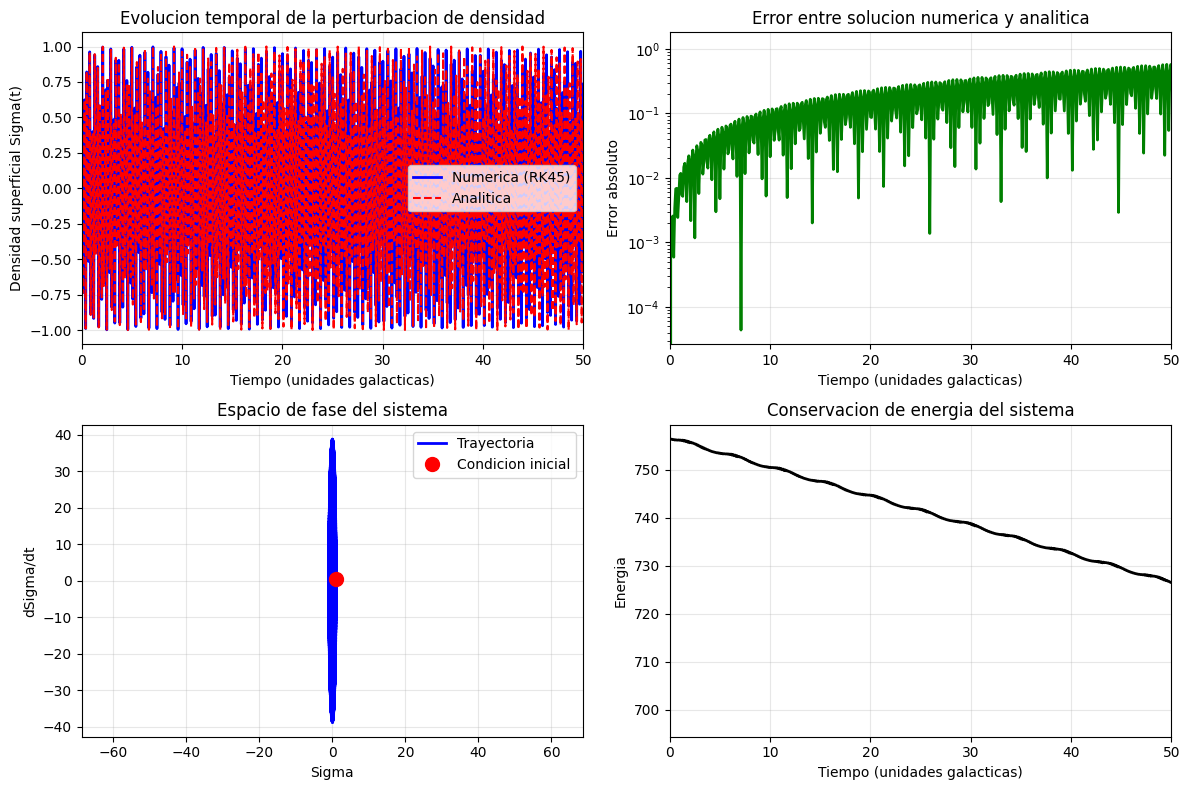

Analisis de estabilidad del sistema
Frecuencia de epiciclo kappa = 38.8909
Matriz del sistema:
[[ 0.0000e+00  1.0000e+00]
 [-1.5125e+03  0.0000e+00]]
Valores propios: [0.+38.89087297j 0.-38.89087297j]
Magnitud de los valores propios: [38.89087297 38.89087297]
Los valores propios son imaginarios puros
Frecuencias de oscilacion: ±38.8909
Analisis de estabilidad para diferentes valores de kappa
kappa = 19.445:
  Valores propios: [0.+19.44543648j 0.-19.44543648j]
  Periodo de oscilacion: 0.323
  Sistema estable: Si
kappa = 38.891:
  Valores propios: [0.+38.89087297j 0.-38.89087297j]
  Periodo de oscilacion: 0.162
  Sistema estable: Si
kappa = 77.782:
  Valores propios: [0.+77.78174593j 0.-77.78174593j]
  Periodo de oscilacion: 0.081
  Sistema estable: Si
kappa = 194.454:
  Valores propios: [0.+194.45436483j 0.-194.45436483j]
  Periodo de oscilacion: 0.032
  Sistema estable: Si


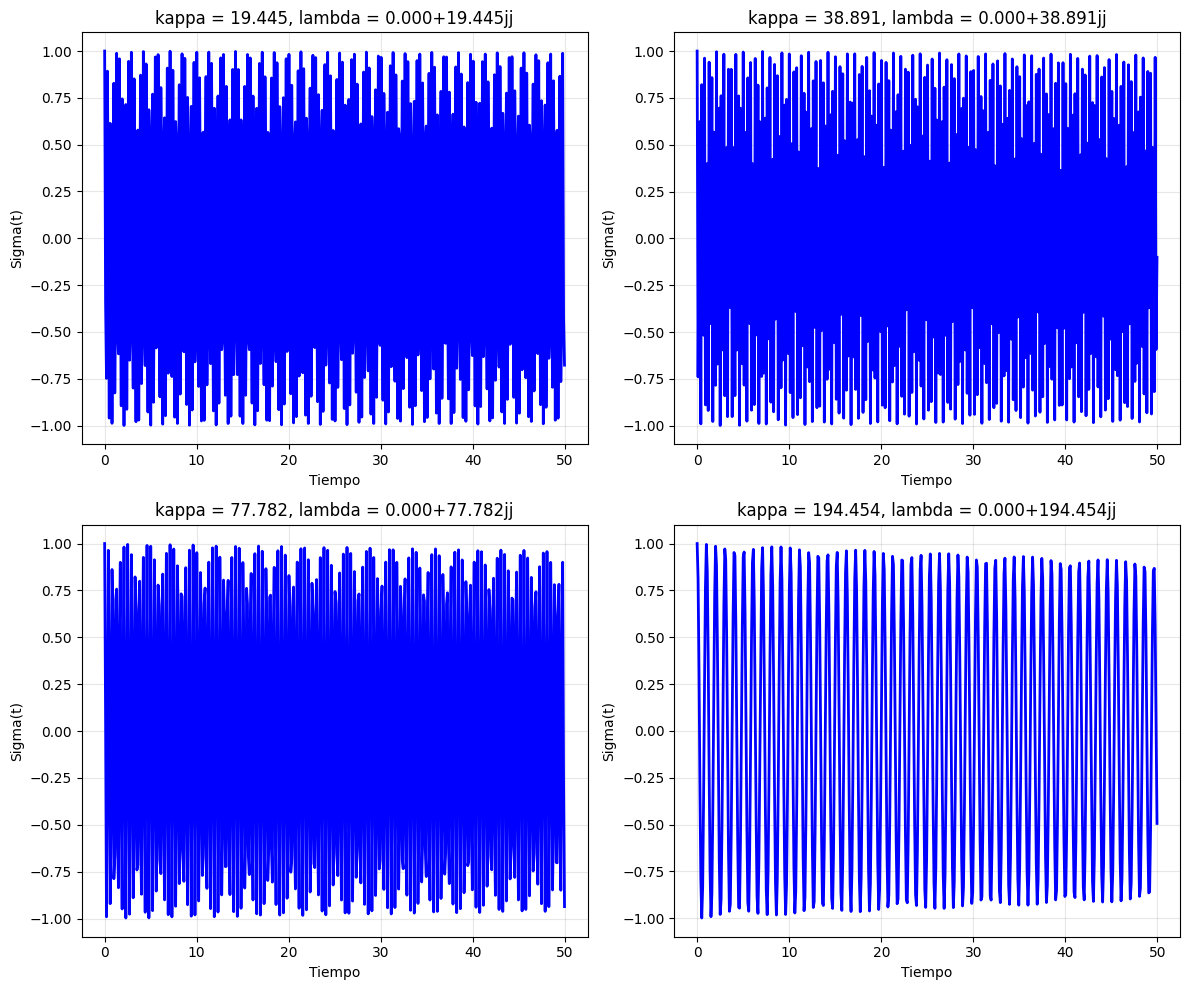

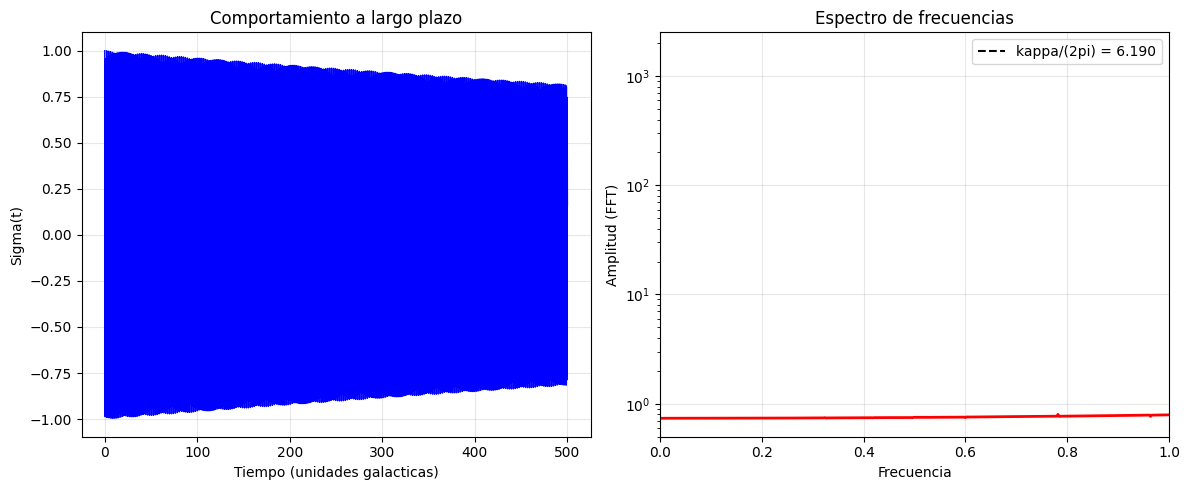

RESUMEN DE RESULTADOS
1. La ecuacion de Jeans describe oscilaciones armonicas con frecuencia kappa
2. Los valores propios son imaginarios puros: ±38.891i
3. El sistema es marginalmente estable (oscilaciones no amortiguadas)
4. El periodo de oscilacion es T = 2π/kappa = 0.162
5. La energia del sistema se conserva
6. Mayor kappa implica oscilaciones mas rapidas pero misma estabilidad


In [17]:
# Parametros del sistema
V0 = 220  # km/s (velocidad de rotacion tipica de la Via Lactea)
r = 8.0   # kpc (radio galactocenrico tipico)
Omega = V0 / r  # frecuencia angular
kappa = np.sqrt(2) * Omega  # frecuencia de epiciclo para curva plana

# Condiciones iniciales
Sigma_0 = 1.0  # densidad superficial inicial normalizada
Sigma_dot_0 = 0.5  # velocidad inicial de la perturbacion

# Sistema de ecuaciones de primer orden
def sistema_jeans(t, estado, kappa):
    Sigma, Sigma_dot = estado
    # d(Sigma)/dt = Sigma_dot
    # d(Sigma_dot)/dt = -kappa^2 * Sigma
    return np.array([Sigma_dot, -kappa**2 * Sigma])

# Solucion analitica
def solucion_analitica(t, Sigma_0, Sigma_dot_0, kappa):
    return Sigma_0 * np.cos(kappa * t) + (Sigma_dot_0 / kappa) * np.sin(kappa * t)

# Matriz del sistema lineal
def matriz_sistema(kappa):
    # Sistema: d/dt [Sigma, Sigma_dot]^T = A [Sigma, Sigma_dot]^T
    A = np.array([[0, 1],
                  [-kappa**2, 0]])
    return A

# Resolver numericamente usando RK4
t_inicial = 0
t_final = 100
num_puntos = 1000
t_eval = np.linspace(t_inicial, t_final, num_puntos)

# Resolver con solve_ivp
sol = solve_ivp(lambda t, y: sistema_jeans(t, y, kappa),
                [t_inicial, t_final],
                [Sigma_0, Sigma_dot_0],
                t_eval=t_eval,
                method='RK45')

# Calcular solucion analitica
Sigma_analitica = solucion_analitica(t_eval, Sigma_0, Sigma_dot_0, kappa)

# Graficar evolucion temporal
plt.figure(figsize=(12, 8))

# Subplot 1: Evolucion temporal de Sigma
plt.subplot(2, 2, 1)
plt.plot(t_eval, sol.y[0], 'b-', linewidth=2, label='Numerica (RK45)')
plt.plot(t_eval, Sigma_analitica, 'r--', linewidth=1.5, label='Analitica')
plt.xlabel('Tiempo (unidades galacticas)')
plt.ylabel('Densidad superficial Sigma(t)')
plt.title('Evolucion temporal de la perturbacion de densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)

# Subplot 2: Error entre solucion numerica y analitica
plt.subplot(2, 2, 2)
error = np.abs(sol.y[0] - Sigma_analitica)
plt.semilogy(t_eval, error, 'g-', linewidth=2)
plt.xlabel('Tiempo (unidades galacticas)')
plt.ylabel('Error absoluto')
plt.title('Error entre solucion numerica y analitica')
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)

# Subplot 3: Espacio de fase
plt.subplot(2, 2, 3)
plt.plot(sol.y[0], sol.y[1], 'b-', linewidth=2, label='Trayectoria')
plt.plot(Sigma_0, Sigma_dot_0, 'ro', markersize=10, label='Condicion inicial')
plt.xlabel('Sigma')
plt.ylabel('dSigma/dt')
plt.title('Espacio de fase del sistema')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Subplot 4: Analisis de energia
energia = 0.5 * sol.y[1]**2 + 0.5 * kappa**2 * sol.y[0]**2
plt.subplot(2, 2, 4)
plt.plot(t_eval, energia, 'k-', linewidth=2)
plt.xlabel('Tiempo (unidades galacticas)')
plt.ylabel('Energia')
plt.title('Conservacion de energia del sistema')
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

# Analisis de valores propios
print("Analisis de estabilidad del sistema")


A = matriz_sistema(kappa)
valores_propios, vectores_propios = np.linalg.eig(A)

print(f"Frecuencia de epiciclo kappa = {kappa:.4f}")
print(f"Matriz del sistema:")
print(A)
print(f"Valores propios: {valores_propios}")
print(f"Magnitud de los valores propios: {np.abs(valores_propios)}")

# Verificar naturaleza de los valores propios
if np.all(np.isreal(valores_propios)):
    print("Los valores propios son reales")
else:
    print("Los valores propios son imaginarios puros")
    print(f"Frecuencias de oscilacion: ±{np.abs(np.imag(valores_propios[0])):.4f}")

# Analisis de estabilidad para diferentes valores de kappa

print("Analisis de estabilidad para diferentes valores de kappa")


kappa_valores = np.array([0.5, 1.0, 2.0, 5.0]) * kappa
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, kappa_test in enumerate(kappa_valores):
    # Resolver para cada kappa
    sol_test = solve_ivp(lambda t, y: sistema_jeans(t, y, kappa_test),
                        [t_inicial, t_final],
                        [Sigma_0, Sigma_dot_0],
                        t_eval=t_eval,
                        method='RK45')

    # Calcular valores propios
    A_test = matriz_sistema(kappa_test)
    vals_propios_test = np.linalg.eigvals(A_test)

    # Graficar
    ax = axes[idx]
    ax.plot(t_eval[:500], sol_test.y[0][:500], 'b-', linewidth=2)
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Sigma(t)')
    ax.set_title(f'kappa = {kappa_test:.3f}, lambda = {vals_propios_test[0]:.3f}j')
    ax.grid(True, alpha=0.3)

    # Imprimir informacion
    periodo = 2*np.pi / kappa_test
    print(f"kappa = {kappa_test:.3f}:")
    print(f"  Valores propios: {vals_propios_test}")
    print(f"  Periodo de oscilacion: {periodo:.3f}")
    print(f"  Sistema estable: {'Si' if np.all(np.real(vals_propios_test) == 0) else 'No'}")

plt.tight_layout()
plt.show()

# Analisis del comportamiento a largo plazo
plt.figure(figsize=(12, 5))

# Graficar para tiempo largo
t_largo = np.linspace(0, 500, 5000)
sol_largo = solve_ivp(lambda t, y: sistema_jeans(t, y, kappa),
                     [0, 500],
                     [Sigma_0, Sigma_dot_0],
                     t_eval=t_largo,
                     method='RK45')

plt.subplot(1, 2, 1)
plt.plot(t_largo, sol_largo.y[0], 'b-', linewidth=1)
plt.xlabel('Tiempo (unidades galacticas)')
plt.ylabel('Sigma(t)')
plt.title('Comportamiento a largo plazo')
plt.grid(True, alpha=0.3)

# Analisis de Fourier
from scipy.fft import fft, fftfreq

plt.subplot(1, 2, 2)
# Calcular FFT
fft_vals = fft(sol_largo.y[0])
frecuencias = fftfreq(len(t_largo), t_largo[1] - t_largo[0])

# Solo frecuencias positivas
idx_pos = frecuencias > 0
plt.semilogy(frecuencias[idx_pos], np.abs(fft_vals[idx_pos]), 'r-', linewidth=2)
plt.axvline(x=kappa/(2*np.pi), color='k', linestyle='--', label=f'kappa/(2pi) = {kappa/(2*np.pi):.3f}')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud (FFT)')
plt.title('Espectro de frecuencias')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

# Resumen de resultados

print("RESUMEN DE RESULTADOS")

print(f"1. La ecuacion de Jeans describe oscilaciones armonicas con frecuencia kappa")
print(f"2. Los valores propios son imaginarios puros: ±{kappa:.3f}i")
print(f"3. El sistema es marginalmente estable (oscilaciones no amortiguadas)")
print(f"4. El periodo de oscilacion es T = 2π/kappa = {2*np.pi/kappa:.3f}")
print(f"5. La energia del sistema se conserva")
print(f"6. Mayor kappa implica oscilaciones mas rapidas pero misma estabilidad")


# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

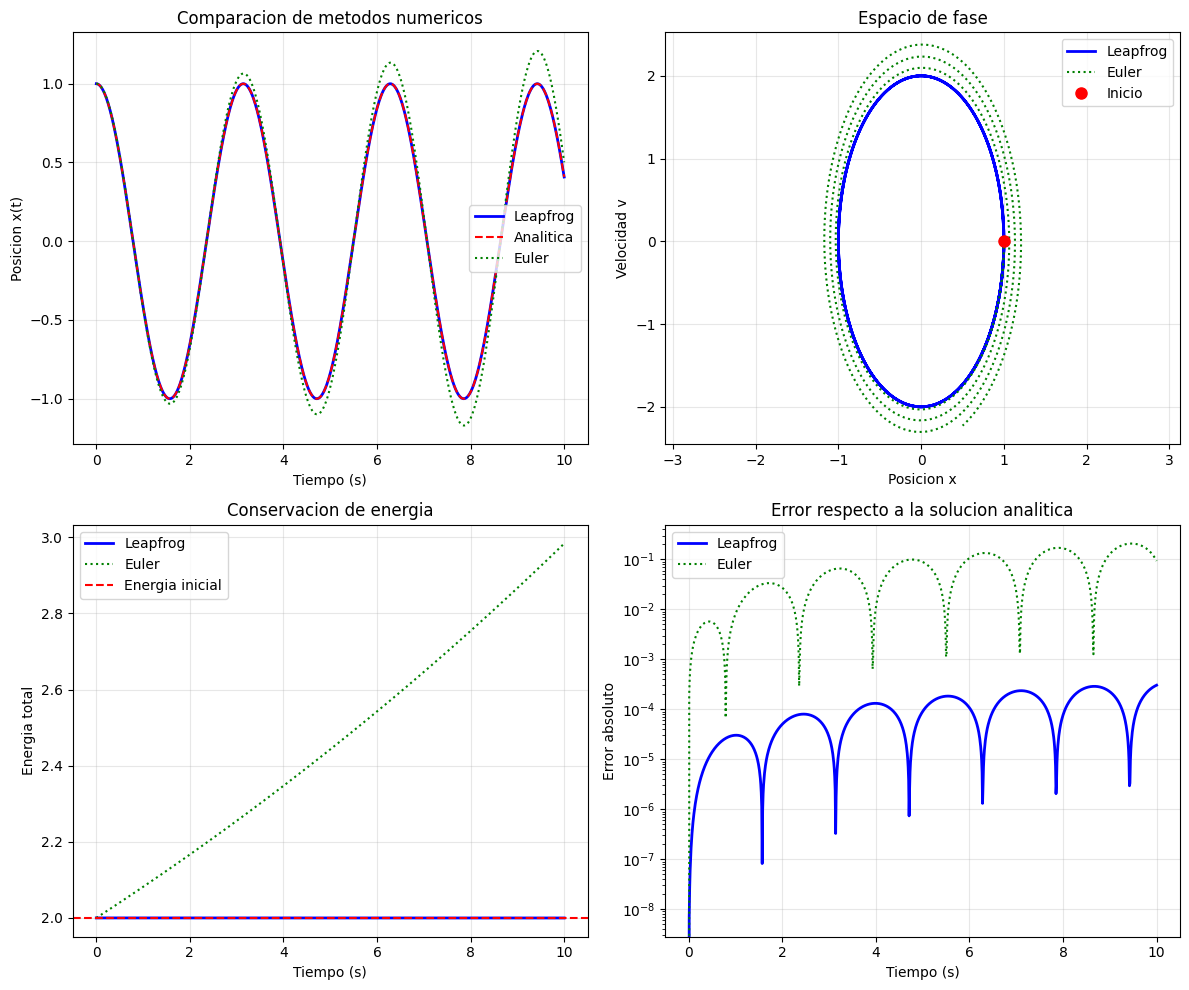

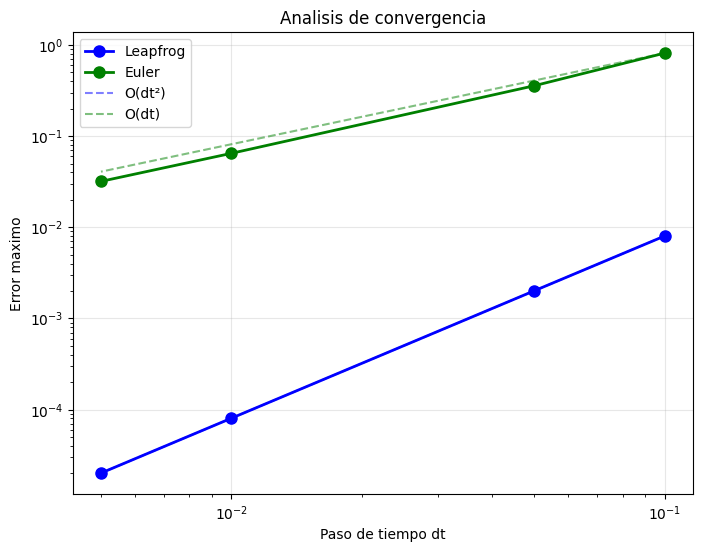

Analisis del metodo Leapfrog
Parametros:
  omega = 2.0 rad/s
  dt = 0.01 s
  Tiempo total = 10.0 s
  Condiciones iniciales: x(0) = 1.0, v(0) = 0.0
Conservacion de energia:
  Energia inicial: 2.000000
  Energia final (Leapfrog): 1.999833
  Error relativo: 8.34e-03%
  Energia final (Euler): 2.983411
  Error relativo: 4.92e+01%
Error maximo en posicion:
  Leapfrog: 2.006037e-05
  Euler: 3.189569e-02
Orden de convergencia:
  Leapfrog: 2.00 (teorico: 2)
  Euler: 1.08 (teorico: 1)


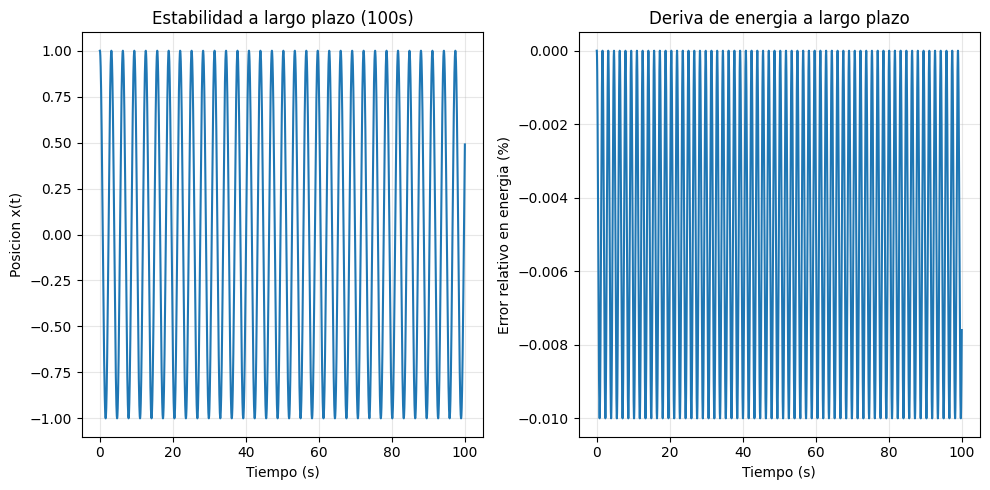

In [18]:
# Parametros del oscilador armonico
omega = 2.0  # rad/s
dt = 0.01    # paso de tiempo
t_final = 10.0  # tiempo final

# Condiciones iniciales
x0 = 1.0
v0 = 0.0

# Funcion de fuerza para el oscilador armonico
def f(x):
    return -omega**2 * x

# Metodo Leapfrog
def leapfrog(x0, v0, dt, t_final):
    num_pasos = int(t_final / dt)
    tiempo = np.zeros(num_pasos + 1)
    x = np.zeros(num_pasos + 1)
    v = np.zeros(num_pasos + 1)

    # Condiciones iniciales
    tiempo[0] = 0
    x[0] = x0
    v[0] = v0

    # Inicializar v_{1/2} usando la relacion dada en la nota
    v_half = v0 + 0.5 * f(x0) * dt

    # Bucle principal del metodo Leapfrog
    for n in range(num_pasos):
        # Actualizar posicion: x_{n+1} = x_n + v_{n+1/2} * dt
        x[n+1] = x[n] + v_half * dt

        # Actualizar velocidad media: v_{n+3/2} = v_{n+1/2} + f(x_{n+1}) * dt
        v_half_nuevo = v_half + f(x[n+1]) * dt

        # Calcular velocidad en el tiempo n+1 para graficar
        # v_{n+1} = (v_{n+1/2} + v_{n+3/2}) / 2
        v[n+1] = (v_half + v_half_nuevo) / 2

        # Actualizar tiempo
        tiempo[n+1] = tiempo[n] + dt

        # Preparar para siguiente iteracion
        v_half = v_half_nuevo

    return tiempo, x, v

# Metodo de Euler para comparacion
def euler(x0, v0, dt, t_final):
    num_pasos = int(t_final / dt)
    tiempo = np.zeros(num_pasos + 1)
    x = np.zeros(num_pasos + 1)
    v = np.zeros(num_pasos + 1)

    tiempo[0] = 0
    x[0] = x0
    v[0] = v0

    for n in range(num_pasos):
        x[n+1] = x[n] + v[n] * dt
        v[n+1] = v[n] + f(x[n]) * dt
        tiempo[n+1] = tiempo[n] + dt

    return tiempo, x, v

# Solucion analitica del oscilador armonico
def solucion_analitica(t):
    return x0 * np.cos(omega * t) + (v0 / omega) * np.sin(omega * t)

# Calcular energia total
def energia(x, v):
    energia_cinetica = 0.5 * v**2
    energia_potencial = 0.5 * omega**2 * x**2
    return energia_cinetica + energia_potencial

# Resolver usando Leapfrog
t_leap, x_leap, v_leap = leapfrog(x0, v0, dt, t_final)

# Resolver usando Euler para comparacion
t_euler, x_euler, v_euler = euler(x0, v0, dt, t_final)

# Calcular solucion analitica
x_analitica = solucion_analitica(t_leap)

# Calcular energias
energia_leap = energia(x_leap, v_leap)
energia_euler = energia(x_euler, v_euler)
energia_inicial = energia(x0, v0)

# Crear graficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Grafica 1: Posicion vs tiempo
axes[0, 0].plot(t_leap, x_leap, 'b-', linewidth=2, label='Leapfrog')
axes[0, 0].plot(t_leap, x_analitica, 'r--', linewidth=1.5, label='Analitica')
axes[0, 0].plot(t_euler, x_euler, 'g:', linewidth=1.5, label='Euler')
axes[0, 0].set_xlabel('Tiempo (s)')
axes[0, 0].set_ylabel('Posicion x(t)')
axes[0, 0].set_title('Comparacion de metodos numericos')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Grafica 2: Espacio de fase
axes[0, 1].plot(x_leap, v_leap, 'b-', linewidth=2, label='Leapfrog')
axes[0, 1].plot(x_euler, v_euler, 'g:', linewidth=1.5, label='Euler')
axes[0, 1].plot(x0, v0, 'ro', markersize=8, label='Inicio')
axes[0, 1].set_xlabel('Posicion x')
axes[0, 1].set_ylabel('Velocidad v')
axes[0, 1].set_title('Espacio de fase')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axis('equal')

# Grafica 3: Conservacion de energia
axes[1, 0].plot(t_leap, energia_leap, 'b-', linewidth=2, label='Leapfrog')
axes[1, 0].plot(t_euler, energia_euler, 'g:', linewidth=1.5, label='Euler')
axes[1, 0].axhline(y=energia_inicial, color='r', linestyle='--', label='Energia inicial')
axes[1, 0].set_xlabel('Tiempo (s)')
axes[1, 0].set_ylabel('Energia total')
axes[1, 0].set_title('Conservacion de energia')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Grafica 4: Error en la posicion
error_leap = np.abs(x_leap - x_analitica)
error_euler = np.abs(x_euler - x_analitica)
axes[1, 1].semilogy(t_leap, error_leap, 'b-', linewidth=2, label='Leapfrog')
axes[1, 1].semilogy(t_euler, error_euler, 'g:', linewidth=1.5, label='Euler')
axes[1, 1].set_xlabel('Tiempo (s)')
axes[1, 1].set_ylabel('Error absoluto')
axes[1, 1].set_title('Error respecto a la solucion analitica')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis de convergencia con diferentes pasos de tiempo
pasos_dt = [0.1, 0.05, 0.01, 0.005]
errores_leap = []
errores_euler = []

for dt_test in pasos_dt:
    # Leapfrog
    t_test, x_test, _ = leapfrog(x0, v0, dt_test, 2*np.pi/omega)
    x_ana_test = solucion_analitica(t_test)
    error_leap = np.max(np.abs(x_test - x_ana_test))
    errores_leap.append(error_leap)

    # Euler
    t_test, x_test, _ = euler(x0, v0, dt_test, 2*np.pi/omega)
    x_ana_test = solucion_analitica(t_test)
    error_euler = np.max(np.abs(x_test - x_ana_test))
    errores_euler.append(error_euler)

# Grafica de convergencia
plt.figure(figsize=(8, 6))
plt.loglog(pasos_dt, errores_leap, 'bo-', linewidth=2, markersize=8, label='Leapfrog')
plt.loglog(pasos_dt, errores_euler, 'go-', linewidth=2, markersize=8, label='Euler')

# Lineas de referencia para orden de convergencia
dt_array = np.array(pasos_dt)
plt.loglog(dt_array, dt_array**2 * errores_leap[0]/pasos_dt[0]**2, 'b--', alpha=0.5, label='O(dt²)')
plt.loglog(dt_array, dt_array * errores_euler[0]/pasos_dt[0], 'g--', alpha=0.5, label='O(dt)')

plt.xlabel('Paso de tiempo dt')
plt.ylabel('Error maximo')
plt.title('Analisis de convergencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Estadisticas finales
print("Analisis del metodo Leapfrog")

print(f"Parametros:")
print(f"  omega = {omega} rad/s")
print(f"  dt = {dt} s")
print(f"  Tiempo total = {t_final} s")
print(f"  Condiciones iniciales: x(0) = {x0}, v(0) = {v0}")

print(f"Conservacion de energia:")
print(f"  Energia inicial: {energia_inicial:.6f}")
print(f"  Energia final (Leapfrog): {energia_leap[-1]:.6f}")
print(f"  Error relativo: {abs(energia_leap[-1] - energia_inicial)/energia_inicial * 100:.2e}%")
print(f"  Energia final (Euler): {energia_euler[-1]:.6f}")
print(f"  Error relativo: {abs(energia_euler[-1] - energia_inicial)/energia_inicial * 100:.2e}%")

print(f"Error maximo en posicion:")
print(f"  Leapfrog: {np.max(error_leap):.6e}")
print(f"  Euler: {np.max(error_euler):.6e}")

print(f"Orden de convergencia:")
# Calcular pendiente en escala log-log
pendiente_leap = np.log(errores_leap[-1]/errores_leap[0]) / np.log(pasos_dt[-1]/pasos_dt[0])
pendiente_euler = np.log(errores_euler[-1]/errores_euler[0]) / np.log(pasos_dt[-1]/pasos_dt[0])
print(f"  Leapfrog: {pendiente_leap:.2f} (teorico: 2)")
print(f"  Euler: {pendiente_euler:.2f} (teorico: 1)")

# Prueba de estabilidad a largo plazo
t_largo = 100.0
t_leap_largo, x_leap_largo, v_leap_largo = leapfrog(x0, v0, dt, t_largo)
energia_leap_largo = energia(x_leap_largo, v_leap_largo)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t_leap_largo, x_leap_largo)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posicion x(t)')
plt.title('Estabilidad a largo plazo (100s)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t_leap_largo, (energia_leap_largo - energia_inicial)/energia_inicial * 100)
plt.xlabel('Tiempo (s)')
plt.ylabel('Error relativo en energia (%)')
plt.title('Deriva de energia a largo plazo')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
